In [1]:
import hiive.mdptoolbox.mdp as mdp
import hiive.mdptoolbox.example as ex
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

In [2]:
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
import numpy as np
np.random.seed(seed=121)
%matplotlib inline

In [3]:
def parsetraj(traj):
    deltas = []
    its = []
    times = []
    rewards = []
    for i in range(len(traj)):
        deltas.append(traj[i]['Error'])
        its.append(traj[i]['Iteration'])
        times.append(traj[i]['Time'])
        rewards.append(traj[i]['Reward'])
    return its, deltas, times, rewards

# Part 1 - non-gridworld, small

In [ ]:
max_iter = 10000
eps = 1e-6

You can keep collectuing the delta for sitting at the final state for a long time, that's why the delta is sometimes larger than the addition of all the deltas for each state. It's also not assumed that you start from scratch at every episode. Essentially, the policy learned says "suppose you acquire a forest this old, what do you do?"

## Value Iteration

##### Look at convergence behavior

In [ ]:
S = 8
r1 = 4
r2 = 2

In [ ]:
P, R = ex.forest(S=S, r1=r1, r2=r2, p=0.2)

In [ ]:
vi = mdp.ValueIteration(P, R, 0.9, max_iter=max_iter, epsilon=eps)
vi.setVerbose()
vi_traj = vi.run()

In [ ]:
its, deltas, times, rewards = parsetraj(vi_traj)

In [ ]:
plt.plot(its, deltas)

In [ ]:
vi.policy

In [ ]:
vi.V

In [ ]:
vi.P

In [ ]:
vi.R

In [ ]:
vi_traj

##### Run over multiple discount factors

In [ ]:
disc_fac_range = [i / 10 for i in range(1, 10, 2)]
# disc_fac_range.append(0.93)
# disc_fac_range.append(0.95)
# disc_fac_range.append(0.99)
# disc_fac_range.append(0.9999)

In [ ]:
plt.figure(figsize=(7,5))
for i in disc_fac_range:
    vi = mdp.ValueIteration(P, R, i, max_iter=max_iter, epsilon=eps)
    vi.setVerbose()
    vi_traj = vi.run()
    print("disc_fact:", i)
    print("policy:", vi.policy)
    print("delta:", vi_traj[-1]['Mean V'])
    print()
    its, deltas, times, rewards = parsetraj(vi_traj)
    a = plt.plot(its, deltas, label=f"{i}");
    
print("Total time:", vi_traj[-1]['Time'])
plt.legend();
# ymax = (10-1)*r2+r1+4;
# plt.yticks(range(0, ymax, 2));
plt.title("Value Iteration - Discount Factors")
plt.xlabel("Iterations")
plt.ylabel("Delta")

Note that above, the value function changes when adding more 9s, but the policy doesn't. 
In this case, it is iterating without improvement and policy iteration might converge faster

##### Run over multiple sizes of the env

In [ ]:
max_forest_size = 12
r1 = 4
r2 = 0.5

In [ ]:
plt.figure(figsize=(7,5))
for i in range(2,max_forest_size+1,2): # forest sizes
    P, R = ex.forest(S=i, r1=r1, r2=r2, p=0.2)
    vi = mdp.ValueIteration(P, R, 0.8, max_iter=max_iter, epsilon=eps)
    vi.setVerbose()
    vi_traj = vi.run()
    print("forest size:", i)
    print("policy:", vi.policy)
    print("delta:", vi_traj[-1]['Mean V'])
    print()
    its, deltas, times, rewards = parsetraj(vi_traj)
    a = plt.plot(its, deltas, label=f"{i}");
    
print("Total time:", vi_traj[-1]['Time'])
plt.legend();
plt.title("Value Iteration - Number of States")
plt.xlabel("Iterations")
plt.ylabel("Delta")

##### Run over multiple probabilities of the forest burning down

In [ ]:
burn_prob = [i / 10 for i in range(1, 10, 2)]
S = 8
r1 = 4
r2 = 1

In [ ]:
plt.figure(figsize=(7,5))
for i in burn_prob:
    np.random.seed(seed=121)
    P, R = ex.forest(S=S, r1=r1, r2=r2, p=i)
    vi = mdp.ValueIteration(P, R, 0.9, max_iter=max_iter, epsilon=eps)
    vi.setVerbose()
    vi_traj = vi.run()
    print("burn probability:", i)
    print("policy:", vi.policy)
    print("delta:", vi_traj[-1]['Mean V'])
    print()
    its, deltas, times, rewards = parsetraj(vi_traj)
    a = plt.plot(its, deltas, label=f"{i}");
    
print("Total time:", vi_traj[-1]['Time'])
plt.legend();
plt.title("Value Iteration - Burn Probability")
plt.xlabel("Iterations")
plt.ylabel("Delta")


## Policy Iteration

look at convergence behavior

In [ ]:
S = 8
r1 = 4
r2 = 2

In [ ]:
P, R = ex.forest(S=S, r1=r1, r2=r2, p=0.2)

In [ ]:
pi = mdp.PolicyIteration(P, R, 0.9, max_iter=max_iter)
pi.setVerbose()
pi_traj = pi.run()

In [ ]:
its, deltas, times, rewards = parsetraj(pi_traj)

In [ ]:
plt.plot(its, deltas)

In [ ]:
pi.policy

In [ ]:
pi.P

In [ ]:
pi_traj;

##### Run over multiple discount factors

In [ ]:
disc_fac_range = [i / 10 for i in range(1, 10, 1)]
disc_fac_range.append(0.93)
disc_fac_range.append(0.95)
# disc_fac_range.append(0.99) Does not converge to normal values
# disc_fac_range.append(0.9999) Does not converge to normal values

In [ ]:
plt.figure(figsize=(7,5))
for i in disc_fac_range:
    pi = mdp.PolicyIteration(P, R, i, max_iter=max_iter)
    pi.setVerbose()
    pi_traj = pi.run()
    print("disc_fact:", i)
    print("policy:", pi.policy)
    print("delta:", pi_traj[-1]['Mean V'])
    print()
    its, deltas, times, rewards = parsetraj(pi_traj)
    print(deltas)
    a = plt.plot(its, deltas, label=f"{i}");
print("Total time:", pi_traj[-1]['Time'])
plt.legend();
plt.title("Value Iteration - Discount Factors")
plt.xlabel("Iterations")
plt.ylabel("Delta")

In [ ]:
(0.95*0.8)**5 * 4

##### Run over multiple sizes of the env

In [ ]:
max_forest_size = 12
r1 = 4
r2 = 0.5

In [ ]:
plt.figure(figsize=(7,5))
for i in range(2,max_forest_size+1): # forest sizes
    P, R = ex.forest(S=i, r1=r1, r2=r2, p=0.2)
    pi = mdp.PolicyIteration(P, R, 0.8, max_iter=max_iter)
    pi.setVerbose()
    pi_traj = pi.run()
    print("forest size:", i)
    print("policy:", pi.policy)
    print("delta:", pi_traj[-1]['Mean V'])
    print()
    its, deltas, times, rewards = parsetraj(pi_traj)
    a = plt.plot(its, deltas, label=f"{i}");
    
print("Total time:", pi_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Delta")

##### Run over multiple probabilities of the forest burning down

In [ ]:
burn_prob = [i / 10 for i in range(1, 10, 1)]
S = 8
r1 = 4
r2 = 1

In [ ]:
plt.figure(figsize=(7,5))
for i in burn_prob:
    np.random.seed(seed=121)
    P, R = ex.forest(S=S, r1=r1, r2=r2, p=i)
    pi = mdp.PolicyIteration(P, R, 0.9, max_iter=max_iter)
    pi.setVerbose()
    pi_traj = pi.run()
    print("burn probability:", i)
    print("policy:", pi.policy)
    print("delta:", pi_traj[-1]['Mean V'])
    print()
    its, deltas, times, rewards = parsetraj(pi_traj)
    a = plt.plot(its, deltas, label=f"{i}");
    
print("Total time:", pi_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Delta")

## Q-Learning

look at convergence behavior

In [ ]:
np.random.seed(seed=121)

In [ ]:
n_iter = 100000
S = 8
r1 = 4
r2 = 2

In [ ]:
P, R = ex.forest(S=S, r1=r1, r2=r2, p=0.2) 

In [ ]:
ql = mdp.QLearning(P, R, 0.9, n_iter=n_iter, epsilon_min=0.333, epsilon_decay=0.9, alpha=2, alpha_decay=0.9999)

In [ ]:
ql_traj = ql.run()

In [ ]:
its, deltas, times, rewards = parsetraj(ql_traj)

In [ ]:
plt.plot(its, deltas)
plt.ylabel("Deltas")
plt.xlabel("Iterations")
plt.title("QLearning - Convergence")

In [ ]:
plt.plot(its, rewards)
plt.ylabel("Rewards")
plt.xlabel("Iterations")
plt.title("QLearning")

In [ ]:
ql.policy

In [ ]:
ql.P

In [ ]:
ql_traj

In [ ]:
ql.V

ql.V after 40,000,000 iterations:  
(4.2005680479972325,  
 4.7791958387931075,  
 5.399034241230377,  
 6.471180813935104,  
 7.9421951813821,  
 10.048198990983755,  
 13.066439778933583,  
 17.039734066172503)

##### Run over multiple discount factors

In [ ]:
disc_fac_range = [0.9,0.5,0.1]
# disc_fac_range.append(0.99) Does not converge to normal values
# disc_fac_range.append(0.9999) Does not converge to normal values

In [ ]:
plt.figure(figsize=(7,5))
for i in disc_fac_range:
    ql = mdp.QLearning(P, R, i, n_iter=60000, epsilon_min=0.333, epsilon_decay=0.9999, alpha=2, alpha_decay=0.9999)
    ql_traj = ql.run()
    print("disc_fact:", i)
    print("policy:", ql.policy)
    print("delta:", ql_traj[-1]['Mean V'])
    print()
    its, deltas, times, rewards = parsetraj(ql_traj)
    a = plt.plot(its, deltas, label=f"{i}");
print("Total time:", ql_traj[-1]['Time'])
plt.legend();
plt.title("QLearning - Discount Factors")
plt.xlabel("Iterations")
plt.ylabel("Delta")

##### Run over multiple alpha decay ratios

alpha = learning rate

In [ ]:
alpha_decays = [0.99999, 0.9999, 0.999, 0.99, 0.95, 0.9] # alpha_decay=0.9999

In [ ]:
plt.figure(figsize=(7,5))
for i in alpha_decays:
    ql = mdp.QLearning(P, R, 0.9, alpha_decay=i, n_iter=100000, epsilon_min=0.333, epsilon_decay=0.9999, alpha=2)
    ql_traj = ql.run()
    print("alpha decay:", i)
    print("policy:", ql.policy)
    print("delta:", ql_traj[-1]['Mean V'])
    print()
    its, deltas, times, rewards = parsetraj(ql_traj)
    a = plt.plot(its, deltas, label=f"{i}");
print("Total time:", ql_traj[-1]['Time'])
plt.legend();
plt.title("QLearning - Alpha Decay Ratio")
plt.xlabel("Iterations")
plt.ylabel("Deltas")
plt.ylim((0,6))

##### Run over multiple epsilon decays

epsilon = how greedy the search is

In [ ]:
epsilon_decays = [0.99999, 0.9999, 0.9, 0.8, 0.6, 0.5, 0.1]

In [ ]:
plt.figure(figsize=(7,5))
for i in epsilon_decays:
    ql = mdp.QLearning(P, R, 0.9, alpha_decay=0.9999, n_iter=100000, epsilon_min=0.1, epsilon_decay=i, alpha=2)
    ql_traj = ql.run()
    print("epsilon decay:", i)
    print("policy:", ql.policy)
    print("delta:", ql_traj[-1]['Mean V'])
    print()
    its, deltas, times, rewards = parsetraj(ql_traj)
    a = plt.plot(its, deltas, label=f"{i}");
print("Total time:", ql_traj[-1]['Time'])
plt.legend();
plt.title("QLearning - Epsilon Decay Ratio")
plt.xlabel("Iterations")
plt.ylabel("Deltas")

##### Run over multiple sizes of the env

In [ ]:
max_forest_size = 12
r1 = 4
r2 = 2

In [ ]:
plt.figure(figsize=(7,5))
for i in range(2,max_forest_size+1,2): # forest sizes
    P, R = ex.forest(S=i, r1=r1, r2=r2, p=0.2)
    ql = mdp.QLearning(P, R, 0.9, n_iter=100000, epsilon_min=0.333, epsilon_decay=0.9999, alpha=2, alpha_decay=0.9999)
    ql_traj = ql.run()
    print("forest size:", i)
    print("policy:", ql.policy)
    print()
    its, deltas, times, rewards = parsetraj(ql_traj)
    a = plt.plot(its, deltas, label=f"{i}");
    
print("Total time:", ql_traj[-1]['Time'])
plt.legend();
plt.title("QLearning - State-space Size")
plt.xlabel("Iterations")
plt.ylabel("Deltas")

In [ ]:
ql.V

##### Run over multiple probabilities of the forest burning down

In [ ]:
burn_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9]
S = 8
r1 = 4
r2 = 1

In [ ]:
plt.figure(figsize=(7,5))
for i in burn_prob:
    P, R = ex.forest(S=S, r1=r1, r2=r2, p=i)
    ql = mdp.QLearning(P, R, 0.9, n_iter=100000, epsilon_min=0.333, epsilon_decay=0.9999, alpha=2, alpha_decay=0.9999)
    ql_traj = ql.run()
    print("burn probability:", i)
    print("policy:", ql.policy)
    print()
    its, deltas, times, rewards = parsetraj(ql_traj)
    a = plt.plot(its, deltas, label=f"{i}");
    
print("Total time:", ql_traj[-1]['Time'])
plt.legend();
plt.title("QLearning - Burn Probability")
plt.xlabel("Iterations")
plt.ylabel("Deltas")

# Part 2 - gridworld, large

In [42]:
def parsetraj(traj):
    deltas = []
    its = []
    times = []
    rewards = []
    for i in range(len(traj)):
        deltas.append(traj[i]['Error'])
        its.append(traj[i]['Iteration'])
        times.append(traj[i]['Time'])
        rewards.append(traj[i]['Reward'])
    return its, deltas, times, rewards

In [43]:
p2seed = 125
np.random.seed(seed=p2seed)
large_map = generate_random_map(size=3, p=0.8)
large_map

['SFF', 'FFF', 'FFG']

In [44]:
env = gym.make("FrozenLake-v0", desc=large_map)
# env.reset() # to actually display the env in real-time
# env.render()
# env

In [45]:
env.observation_space.n

9

In [46]:
env.action_space.n

# LEFT = 0
# DOWN = 1
# RIGHT = 2
# UP = 3

4

In [47]:
env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 3, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 3, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 3, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},


In [48]:
def gym_to_mdp(env):
    # define action and state spaces
    A = env.action_space.n
    S = env.observation_space.n

    # initialize mdptoolbox P and R
    P = np.zeros((A,S,S))
    R = np.zeros((A,S,S))
#     R = np.zeros((S,A))
          
    for s in range(S): # for state s that you start from
        for a in range(A): # by taking action a
            for prob, new_state, rew, term in env.P[s][a]: # look at each outcome
                P[a,s, new_state] += prob
                if term and rew==0:
                    R[a,s, new_state] += -10
                else:
                    R[a,s, new_state] += rew*10
#                 if term and rew==0:
#                     rew = -1
#                 R[s,a] += prob * rew
                
                
    R[R==0] = -0.1
    R[:,-1,-1] = 10
#     R[-1,:] = 0
    
    return P,R
    
    
gym_to_mdp(env)

(array([[[0.66666667, 0.        , 0.        , 0.33333333, 0.        ,
          0.        , 0.        , 0.        , 0.        ],
         [0.33333333, 0.33333333, 0.        , 0.        , 0.33333333,
          0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.33333333, 0.33333333, 0.        , 0.        ,
          0.33333333, 0.        , 0.        , 0.        ],
         [0.33333333, 0.        , 0.        , 0.33333333, 0.        ,
          0.        , 0.33333333, 0.        , 0.        ],
         [0.        , 0.33333333, 0.        , 0.33333333, 0.        ,
          0.        , 0.        , 0.33333333, 0.        ],
         [0.        , 0.        , 0.33333333, 0.        , 0.33333333,
          0.        , 0.        , 0.        , 0.33333333],
         [0.        , 0.        , 0.        , 0.33333333, 0.        ,
          0.        , 0.66666667, 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.33333333,
          0.        , 0.333

In [49]:
def print_policy(policy, S):
    for i in range(S):
        for j in range(S):
            print(policy[S*i+j], " ", end="")
        print()
        
def print_map(large_map,S):
    for i in range(S):
        for j in range(S):
            print(large_map[i][j], " ", end="")
        print()

## Value Iteration

In [77]:
max_iter = 10000
eps = 1e-6

##### Look at convergence behavior

In [78]:
S = 16

In [79]:
np.random.seed(seed=p2seed)
large_map = generate_random_map(size=S, p=0.90) #p is prob frozen
env = gym.make("FrozenLake-v0", desc=large_map, is_slippery=True)
P, R = gym_to_mdp(env)

In [80]:
P

array([[[0.66666667, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.33333333, 0.33333333, 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.33333333, 0.33333333, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.33333333,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 1.        ]],

       [[0.33333333, 0.33333333, 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.33333333, 0.        , 0.33333333, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.33333333, 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.33333333,
         0.33333333, 0.        ],
        [0. 

In [81]:
R

array([[[ -0.1,  -0.1,  -0.1, ...,  -0.1,  -0.1,  -0.1],
        [ -0.1,  -0.1,  -0.1, ...,  -0.1,  -0.1,  -0.1],
        [ -0.1,  -0.1,  -0.1, ...,  -0.1,  -0.1,  -0.1],
        ...,
        [ -0.1,  -0.1,  -0.1, ...,  -0.1,  -0.1,  -0.1],
        [ -0.1,  -0.1,  -0.1, ...,  -0.1, -10. ,  -0.1],
        [ -0.1,  -0.1,  -0.1, ...,  -0.1,  -0.1,  10. ]],

       [[ -0.1,  -0.1,  -0.1, ...,  -0.1,  -0.1,  -0.1],
        [ -0.1,  -0.1,  -0.1, ...,  -0.1,  -0.1,  -0.1],
        [ -0.1,  -0.1,  -0.1, ...,  -0.1,  -0.1,  -0.1],
        ...,
        [ -0.1,  -0.1,  -0.1, ...,  -0.1, -10. ,  -0.1],
        [ -0.1,  -0.1,  -0.1, ...,  -0.1, -10. ,  -0.1],
        [ -0.1,  -0.1,  -0.1, ...,  -0.1,  -0.1,  10. ]],

       [[ -0.1,  -0.1,  -0.1, ...,  -0.1,  -0.1,  -0.1],
        [ -0.1,  -0.1,  -0.1, ...,  -0.1,  -0.1,  -0.1],
        [ -0.1,  -0.1,  -0.1, ...,  -0.1,  -0.1,  -0.1],
        ...,
        [ -0.1,  -0.1,  -0.1, ...,  -0.1, -10. ,  -0.1],
        [ -0.1,  -0.1,  -0.1, ...,  -0.1, -10

In [89]:
vi = mdp.ValueIteration(P, R, 0.999, max_iter=max_iter, epsilon=eps, initial_value=[50]*S**2)
vi.setVerbose()
vi_traj = vi.run()

 Iteration   Variation
         1   20.000000
         2   19.980000
         3   19.960020
         4   19.940060
         5   19.920120
         6   19.900200
         7   19.880300
         8   19.860419
         9   19.840559
        10   19.820718
        11   19.800898
        12   19.781097
        13   19.761316
        14   19.741554
        15   19.721813
        16   19.702091
        17   19.682389
        18   19.662706
        19   19.643044
        20   19.623401
        21   19.603777
        22   19.584174
        23   19.564589
        24   19.545025
        25   19.525480
        26   19.505954
        27   19.486448
        28   19.466962
        29   19.447495
        30   19.428047
        31   19.408619
        32   19.389211
        33   19.369822
        34   19.350452
        35   19.331101
        36   19.311770
        37   19.292458
        38   19.273166
        39   19.253893
        40   19.234639
        41   19.215404
        42   19.196189
        43 

       938    7.832357
       939    7.824524
       940    7.816700
       941    7.808883
       942    7.801074
       943    7.793273
       944    7.785480
       945    7.777695
       946    7.769917
       947    7.762147
       948    7.754385
       949    7.746630
       950    7.738884
       951    7.731145
       952    7.723414
       953    7.715690
       954    7.707975
       955    7.700267
       956    7.692566
       957    7.684874
       958    7.677189
       959    7.669512
       960    7.661842
       961    7.654180
       962    7.646526
       963    7.638880
       964    7.631241
       965    7.623610
       966    7.615986
       967    7.608370
       968    7.600762
       969    7.593161
       970    7.585568
       971    7.577982
       972    7.570404
       973    7.562834
       974    7.555271
       975    7.547716
       976    7.540168
       977    7.532628
       978    7.525095
       979    7.517570
       980    7.510052
       981 

      1997    2.714842
      1998    2.712127
      1999    2.709415
      2000    2.706705
      2001    2.703999
      2002    2.701295
      2003    2.698593
      2004    2.695895
      2005    2.693199
      2006    2.690506
      2007    2.687815
      2008    2.685127
      2009    2.682442
      2010    2.679760
      2011    2.677080
      2012    2.674403
      2013    2.671728
      2014    2.669057
      2015    2.666388
      2016    2.663721
      2017    2.661058
      2018    2.658396
      2019    2.655738
      2020    2.653082
      2021    2.650429
      2022    2.647779
      2023    2.645131
      2024    2.642486
      2025    2.639843
      2026    2.637204
      2027    2.634566
      2028    2.631932
      2029    2.629300
      2030    2.626671
      2031    2.624044
      2032    2.621420
      2033    2.618798
      2034    2.616180
      2035    2.613563
      2036    2.610950
      2037    2.608339
      2038    2.605731
      2039    2.603125
      2040 

      2733    1.300001
      2734    1.298701
      2735    1.297403
      2736    1.296105
      2737    1.294809
      2738    1.293514
      2739    1.292221
      2740    1.290929
      2741    1.289638
      2742    1.288348
      2743    1.287060
      2744    1.285773
      2745    1.284487
      2746    1.283202
      2747    1.281919
      2748    1.280637
      2749    1.279357
      2750    1.278077
      2751    1.276799
      2752    1.275522
      2753    1.274247
      2754    1.272973
      2755    1.271700
      2756    1.270428
      2757    1.269158
      2758    1.267888
      2759    1.266621
      2760    1.265354
      2761    1.264089
      2762    1.262824
      2763    1.261562
      2764    1.260300
      2765    1.259040
      2766    1.257781
      2767    1.256523
      2768    1.255266
      2769    1.254011
      2770    1.252757
      2771    1.251504
      2772    1.250253
      2773    1.249003
      2774    1.247754
      2775    1.246506
      2776 

      3806    0.444337
      3807    0.443893
      3808    0.443449
      3809    0.443006
      3810    0.442563
      3811    0.442120
      3812    0.441678
      3813    0.441236
      3814    0.440795
      3815    0.440354
      3816    0.439914
      3817    0.439474
      3818    0.439034
      3819    0.438595
      3820    0.438157
      3821    0.437719
      3822    0.437281
      3823    0.436844
      3824    0.436407
      3825    0.435970
      3826    0.435534
      3827    0.435099
      3828    0.434664
      3829    0.434229
      3830    0.433795
      3831    0.433361
      3832    0.432928
      3833    0.432495
      3834    0.432062
      3835    0.431630
      3836    0.431199
      3837    0.430767
      3838    0.430337
      3839    0.429906
      3840    0.429476
      3841    0.429047
      3842    0.428618
      3843    0.428189
      3844    0.427761
      3845    0.427333
      3846    0.426906
      3847    0.426479
      3848    0.426053
      3849 

      4812    0.162403
      4813    0.162241
      4814    0.162078
      4815    0.161916
      4816    0.161754
      4817    0.161593
      4818    0.161431
      4819    0.161270
      4820    0.161108
      4821    0.160947
      4822    0.160786
      4823    0.160625
      4824    0.160465
      4825    0.160304
      4826    0.160144
      4827    0.159984
      4828    0.159824
      4829    0.159664
      4830    0.159504
      4831    0.159345
      4832    0.159186
      4833    0.159026
      4834    0.158867
      4835    0.158708
      4836    0.158550
      4837    0.158391
      4838    0.158233
      4839    0.158075
      4840    0.157917
      4841    0.157759
      4842    0.157601
      4843    0.157443
      4844    0.157286
      4845    0.157128
      4846    0.156971
      4847    0.156814
      4848    0.156658
      4849    0.156501
      4850    0.156344
      4851    0.156188
      4852    0.156032
      4853    0.155876
      4854    0.155720
      4855 

      5764    0.062653
      5765    0.062590
      5766    0.062527
      5767    0.062465
      5768    0.062402
      5769    0.062340
      5770    0.062278
      5771    0.062215
      5772    0.062153
      5773    0.062091
      5774    0.062029
      5775    0.061967
      5776    0.061905
      5777    0.061843
      5778    0.061781
      5779    0.061719
      5780    0.061658
      5781    0.061596
      5782    0.061534
      5783    0.061473
      5784    0.061411
      5785    0.061350
      5786    0.061289
      5787    0.061227
      5788    0.061166
      5789    0.061105
      5790    0.061044
      5791    0.060983
      5792    0.060922
      5793    0.060861
      5794    0.060800
      5795    0.060739
      5796    0.060678
      5797    0.060618
      5798    0.060557
      5799    0.060497
      5800    0.060436
      5801    0.060376
      5802    0.060315
      5803    0.060255
      5804    0.060195
      5805    0.060134
      5806    0.060074
      5807 

      6869    0.020740
      6870    0.020719
      6871    0.020698
      6872    0.020678
      6873    0.020657
      6874    0.020636
      6875    0.020616
      6876    0.020595
      6877    0.020574
      6878    0.020554
      6879    0.020533
      6880    0.020513
      6881    0.020492
      6882    0.020472
      6883    0.020451
      6884    0.020431
      6885    0.020410
      6886    0.020390
      6887    0.020370
      6888    0.020349
      6889    0.020329
      6890    0.020309
      6891    0.020288
      6892    0.020268
      6893    0.020248
      6894    0.020227
      6895    0.020207
      6896    0.020187
      6897    0.020167
      6898    0.020147
      6899    0.020126
      6900    0.020106
      6901    0.020086
      6902    0.020066
      6903    0.020046
      6904    0.020026
      6905    0.020006
      6906    0.019986
      6907    0.019966
      6908    0.019946
      6909    0.019926
      6910    0.019906
      6911    0.019886
      6912 

      7802    0.008155
      7803    0.008146
      7804    0.008138
      7805    0.008130
      7806    0.008122
      7807    0.008114
      7808    0.008106
      7809    0.008098
      7810    0.008090
      7811    0.008082
      7812    0.008073
      7813    0.008065
      7814    0.008057
      7815    0.008049
      7816    0.008041
      7817    0.008033
      7818    0.008025
      7819    0.008017
      7820    0.008009
      7821    0.008001
      7822    0.007993
      7823    0.007985
      7824    0.007977
      7825    0.007969
      7826    0.007961
      7827    0.007953
      7828    0.007945
      7829    0.007937
      7830    0.007929
      7831    0.007921
      7832    0.007913
      7833    0.007906
      7834    0.007898
      7835    0.007890
      7836    0.007882
      7837    0.007874
      7838    0.007866
      7839    0.007858
      7840    0.007850
      7841    0.007843
      7842    0.007835
      7843    0.007827
      7844    0.007819
      7845 

      8586    0.003722
      8587    0.003718
      8588    0.003714
      8589    0.003711
      8590    0.003707
      8591    0.003703
      8592    0.003699
      8593    0.003696
      8594    0.003692
      8595    0.003688
      8596    0.003685
      8597    0.003681
      8598    0.003677
      8599    0.003674
      8600    0.003670
      8601    0.003666
      8602    0.003663
      8603    0.003659
      8604    0.003655
      8605    0.003652
      8606    0.003648
      8607    0.003644
      8608    0.003641
      8609    0.003637
      8610    0.003633
      8611    0.003630
      8612    0.003626
      8613    0.003623
      8614    0.003619
      8615    0.003615
      8616    0.003612
      8617    0.003608
      8618    0.003604
      8619    0.003601
      8620    0.003597
      8621    0.003594
      8622    0.003590
      8623    0.003586
      8624    0.003583
      8625    0.003579
      8626    0.003576
      8627    0.003572
      8628    0.003569
      8629 

      9220    0.001974
      9221    0.001972
      9222    0.001970
      9223    0.001968
      9224    0.001966
      9225    0.001964
      9226    0.001962
      9227    0.001960
      9228    0.001958
      9229    0.001956
      9230    0.001954
      9231    0.001952
      9232    0.001950
      9233    0.001948
      9234    0.001946
      9235    0.001944
      9236    0.001942
      9237    0.001940
      9238    0.001938
      9239    0.001936
      9240    0.001935
      9241    0.001933
      9242    0.001931
      9243    0.001929
      9244    0.001927
      9245    0.001925
      9246    0.001923
      9247    0.001921
      9248    0.001919
      9249    0.001917
      9250    0.001915
      9251    0.001913
      9252    0.001911
      9253    0.001910
      9254    0.001908
      9255    0.001906
      9256    0.001904
      9257    0.001902
      9258    0.001900
      9259    0.001898
      9260    0.001896
      9261    0.001894
      9262    0.001892
      9263 

      9852    0.001049
      9853    0.001048
      9854    0.001047
      9855    0.001046
      9856    0.001045
      9857    0.001043
      9858    0.001042
      9859    0.001041
      9860    0.001040
      9861    0.001039
      9862    0.001038
      9863    0.001037
      9864    0.001036
      9865    0.001035
      9866    0.001034
      9867    0.001033
      9868    0.001032
      9869    0.001031
      9870    0.001030
      9871    0.001029
      9872    0.001028
      9873    0.001027
      9874    0.001026
      9875    0.001025
      9876    0.001024
      9877    0.001023
      9878    0.001022
      9879    0.001021
      9880    0.001020
      9881    0.001019
      9882    0.001018
      9883    0.001017
      9884    0.001016
      9885    0.001015
      9886    0.001014
      9887    0.001013
      9888    0.001012
      9889    0.001011
      9890    0.001010
      9891    0.001009
      9892    0.001008
      9893    0.001007
      9894    0.001006
      9895 

     10574    0.000509
     10575    0.000509
     10576    0.000508
     10577    0.000508
     10578    0.000507
     10579    0.000507
     10580    0.000506
     10581    0.000506
     10582    0.000505
     10583    0.000505
     10584    0.000504
     10585    0.000504
     10586    0.000503
     10587    0.000503
     10588    0.000502
     10589    0.000502
     10590    0.000501
     10591    0.000501
     10592    0.000500
     10593    0.000500
     10594    0.000499
     10595    0.000499
     10596    0.000498
     10597    0.000498
     10598    0.000497
     10599    0.000497
     10600    0.000496
     10601    0.000496
     10602    0.000495
     10603    0.000495
     10604    0.000494
     10605    0.000494
     10606    0.000493
     10607    0.000493
     10608    0.000492
     10609    0.000492
     10610    0.000491
     10611    0.000491
     10612    0.000490
     10613    0.000490
     10614    0.000489
     10615    0.000489
     10616    0.000488
     10617 

     11377    0.000228
     11378    0.000228
     11379    0.000228
     11380    0.000227
     11381    0.000227
     11382    0.000227
     11383    0.000227
     11384    0.000226
     11385    0.000226
     11386    0.000226
     11387    0.000226
     11388    0.000226
     11389    0.000225
     11390    0.000225
     11391    0.000225
     11392    0.000225
     11393    0.000224
     11394    0.000224
     11395    0.000224
     11396    0.000224
     11397    0.000224
     11398    0.000223
     11399    0.000223
     11400    0.000223
     11401    0.000223
     11402    0.000222
     11403    0.000222
     11404    0.000222
     11405    0.000222
     11406    0.000222
     11407    0.000221
     11408    0.000221
     11409    0.000221
     11410    0.000221
     11411    0.000220
     11412    0.000220
     11413    0.000220
     11414    0.000220
     11415    0.000220
     11416    0.000219
     11417    0.000219
     11418    0.000219
     11419    0.000219
     11420 

     12165    0.000104
     12166    0.000104
     12167    0.000103
     12168    0.000103
     12169    0.000103
     12170    0.000103
     12171    0.000103
     12172    0.000103
     12173    0.000103
     12174    0.000103
     12175    0.000103
     12176    0.000103
     12177    0.000102
     12178    0.000102
     12179    0.000102
     12180    0.000102
     12181    0.000102
     12182    0.000102
     12183    0.000102
     12184    0.000102
     12185    0.000102
     12186    0.000102
     12187    0.000101
     12188    0.000101
     12189    0.000101
     12190    0.000101
     12191    0.000101
     12192    0.000101
     12193    0.000101
     12194    0.000101
     12195    0.000101
     12196    0.000100
     12197    0.000100
     12198    0.000100
     12199    0.000100
     12200    0.000100
     12201    0.000100
     12202    0.000100
     12203    0.000100
     12204    0.000100
     12205    0.000100
     12206    0.000099
     12207    0.000099
     12208 

     13030    0.000044
     13031    0.000044
     13032    0.000044
     13033    0.000043
     13034    0.000043
     13035    0.000043
     13036    0.000043
     13037    0.000043
     13038    0.000043
     13039    0.000043
     13040    0.000043
     13041    0.000043
     13042    0.000043
     13043    0.000043
     13044    0.000043
     13045    0.000043
     13046    0.000043
     13047    0.000043
     13048    0.000043
     13049    0.000043
     13050    0.000043
     13051    0.000043
     13052    0.000043
     13053    0.000043
     13054    0.000043
     13055    0.000043
     13056    0.000043
     13057    0.000042
     13058    0.000042
     13059    0.000042
     13060    0.000042
     13061    0.000042
     13062    0.000042
     13063    0.000042
     13064    0.000042
     13065    0.000042
     13066    0.000042
     13067    0.000042
     13068    0.000042
     13069    0.000042
     13070    0.000042
     13071    0.000042
     13072    0.000042
     13073 

     13865    0.000019
     13866    0.000019
     13867    0.000019
     13868    0.000019
     13869    0.000019
     13870    0.000019
     13871    0.000019
     13872    0.000019
     13873    0.000019
     13874    0.000019
     13875    0.000019
     13876    0.000019
     13877    0.000019
     13878    0.000019
     13879    0.000019
     13880    0.000019
     13881    0.000019
     13882    0.000019
     13883    0.000019
     13884    0.000019
     13885    0.000019
     13886    0.000019
     13887    0.000019
     13888    0.000018
     13889    0.000018
     13890    0.000018
     13891    0.000018
     13892    0.000018
     13893    0.000018
     13894    0.000018
     13895    0.000018
     13896    0.000018
     13897    0.000018
     13898    0.000018
     13899    0.000018
     13900    0.000018
     13901    0.000018
     13902    0.000018
     13903    0.000018
     13904    0.000018
     13905    0.000018
     13906    0.000018
     13907    0.000018
     13908 

     14462    0.000010
     14463    0.000010
     14464    0.000010
     14465    0.000010
     14466    0.000010
     14467    0.000010
     14468    0.000010
     14469    0.000010
     14470    0.000010
     14471    0.000010
     14472    0.000010
     14473    0.000010
     14474    0.000010
     14475    0.000010
     14476    0.000010
     14477    0.000010
     14478    0.000010
     14479    0.000010
     14480    0.000010
     14481    0.000010
     14482    0.000010
     14483    0.000010
     14484    0.000010
     14485    0.000010
     14486    0.000010
     14487    0.000010
     14488    0.000010
     14489    0.000010
     14490    0.000010
     14491    0.000010
     14492    0.000010
     14493    0.000010
     14494    0.000010
     14495    0.000010
     14496    0.000010
     14497    0.000010
     14498    0.000010
     14499    0.000010
     14500    0.000010
     14501    0.000010
     14502    0.000010
     14503    0.000010
     14504    0.000010
     14505 

     15156    0.000005
     15157    0.000005
     15158    0.000005
     15159    0.000005
     15160    0.000005
     15161    0.000005
     15162    0.000005
     15163    0.000005
     15164    0.000005
     15165    0.000005
     15166    0.000005
     15167    0.000005
     15168    0.000005
     15169    0.000005
     15170    0.000005
     15171    0.000005
     15172    0.000005
     15173    0.000005
     15174    0.000005
     15175    0.000005
     15176    0.000005
     15177    0.000005
     15178    0.000005
     15179    0.000005
     15180    0.000005
     15181    0.000005
     15182    0.000005
     15183    0.000005
     15184    0.000005
     15185    0.000005
     15186    0.000005
     15187    0.000005
     15188    0.000005
     15189    0.000005
     15190    0.000005
     15191    0.000005
     15192    0.000005
     15193    0.000005
     15194    0.000005
     15195    0.000005
     15196    0.000005
     15197    0.000005
     15198    0.000005
     15199 

     16125    0.000002
     16126    0.000002
     16127    0.000002
     16128    0.000002
     16129    0.000002
     16130    0.000002
     16131    0.000002
     16132    0.000002
     16133    0.000002
     16134    0.000002
     16135    0.000002
     16136    0.000002
     16137    0.000002
     16138    0.000002
     16139    0.000002
     16140    0.000002
     16141    0.000002
     16142    0.000002
     16143    0.000002
     16144    0.000002
     16145    0.000002
     16146    0.000002
     16147    0.000002
     16148    0.000002
     16149    0.000002
     16150    0.000002
     16151    0.000002
     16152    0.000002
     16153    0.000002
     16154    0.000002
     16155    0.000002
     16156    0.000002
     16157    0.000002
     16158    0.000002
     16159    0.000002
     16160    0.000002
     16161    0.000002
     16162    0.000002
     16163    0.000002
     16164    0.000002
     16165    0.000002
     16166    0.000002
     16167    0.000002
     16168 

     17108    0.000001
     17109    0.000001
     17110    0.000001
     17111    0.000001
     17112    0.000001
     17113    0.000001
     17114    0.000001
     17115    0.000001
     17116    0.000001
     17117    0.000001
     17118    0.000001
     17119    0.000001
     17120    0.000001
     17121    0.000001
     17122    0.000001
     17123    0.000001
     17124    0.000001
     17125    0.000001
     17126    0.000001
     17127    0.000001
     17128    0.000001
     17129    0.000001
     17130    0.000001
     17131    0.000001
     17132    0.000001
     17133    0.000001
     17134    0.000001
     17135    0.000001
     17136    0.000001
     17137    0.000001
     17138    0.000001
     17139    0.000001
     17140    0.000001
     17141    0.000001
     17142    0.000001
     17143    0.000001
     17144    0.000001
     17145    0.000001
     17146    0.000001
     17147    0.000001
     17148    0.000001
     17149    0.000001
     17150    0.000001
     17151 

     18081    0.000000
     18082    0.000000
     18083    0.000000
     18084    0.000000
     18085    0.000000
     18086    0.000000
     18087    0.000000
     18088    0.000000
     18089    0.000000
     18090    0.000000
     18091    0.000000
     18092    0.000000
     18093    0.000000
     18094    0.000000
     18095    0.000000
     18096    0.000000
     18097    0.000000
     18098    0.000000
     18099    0.000000
     18100    0.000000
     18101    0.000000
     18102    0.000000
     18103    0.000000
     18104    0.000000
     18105    0.000000
     18106    0.000000
     18107    0.000000
     18108    0.000000
     18109    0.000000
     18110    0.000000
     18111    0.000000
     18112    0.000000
     18113    0.000000
     18114    0.000000
     18115    0.000000
     18116    0.000000
     18117    0.000000
     18118    0.000000
     18119    0.000000
     18120    0.000000
     18121    0.000000
     18122    0.000000
     18123    0.000000
     18124 

     19005    0.000000
     19006    0.000000
     19007    0.000000
     19008    0.000000
     19009    0.000000
     19010    0.000000
     19011    0.000000
     19012    0.000000
     19013    0.000000
     19014    0.000000
     19015    0.000000
     19016    0.000000
     19017    0.000000
     19018    0.000000
     19019    0.000000
     19020    0.000000
     19021    0.000000
     19022    0.000000
     19023    0.000000
     19024    0.000000
     19025    0.000000
     19026    0.000000
     19027    0.000000
     19028    0.000000
     19029    0.000000
     19030    0.000000
     19031    0.000000
     19032    0.000000
     19033    0.000000
     19034    0.000000
     19035    0.000000
     19036    0.000000
     19037    0.000000
     19038    0.000000
     19039    0.000000
     19040    0.000000
     19041    0.000000
     19042    0.000000
     19043    0.000000
     19044    0.000000
     19045    0.000000
     19046    0.000000
     19047    0.000000
     19048 

     19808    0.000000
     19809    0.000000
     19810    0.000000
     19811    0.000000
     19812    0.000000
     19813    0.000000
     19814    0.000000
     19815    0.000000
     19816    0.000000
     19817    0.000000
     19818    0.000000
     19819    0.000000
     19820    0.000000
     19821    0.000000
     19822    0.000000
     19823    0.000000
     19824    0.000000
     19825    0.000000
     19826    0.000000
     19827    0.000000
     19828    0.000000
     19829    0.000000
     19830    0.000000
     19831    0.000000
     19832    0.000000
     19833    0.000000
     19834    0.000000
     19835    0.000000
     19836    0.000000
     19837    0.000000
     19838    0.000000
     19839    0.000000
     19840    0.000000
     19841    0.000000
     19842    0.000000
     19843    0.000000
     19844    0.000000
     19845    0.000000
     19846    0.000000
     19847    0.000000
     19848    0.000000
     19849    0.000000
     19850    0.000000
     19851 

     20628    0.000000
     20629    0.000000
     20630    0.000000
     20631    0.000000
     20632    0.000000
     20633    0.000000
     20634    0.000000
     20635    0.000000
     20636    0.000000
     20637    0.000000
     20638    0.000000
     20639    0.000000
     20640    0.000000
     20641    0.000000
     20642    0.000000
     20643    0.000000
     20644    0.000000
     20645    0.000000
     20646    0.000000
     20647    0.000000
     20648    0.000000
     20649    0.000000
     20650    0.000000
     20651    0.000000
     20652    0.000000
     20653    0.000000
     20654    0.000000
     20655    0.000000
     20656    0.000000
     20657    0.000000
     20658    0.000000
     20659    0.000000
     20660    0.000000
     20661    0.000000
     20662    0.000000
     20663    0.000000
     20664    0.000000
     20665    0.000000
     20666    0.000000
     20667    0.000000
     20668    0.000000
     20669    0.000000
     20670    0.000000
     20671 

     21545    0.000000
     21546    0.000000
     21547    0.000000
     21548    0.000000
     21549    0.000000
     21550    0.000000
     21551    0.000000
     21552    0.000000
     21553    0.000000
     21554    0.000000
     21555    0.000000
     21556    0.000000
     21557    0.000000
     21558    0.000000
     21559    0.000000
     21560    0.000000
     21561    0.000000
     21562    0.000000
     21563    0.000000
     21564    0.000000
     21565    0.000000
     21566    0.000000
     21567    0.000000
     21568    0.000000
     21569    0.000000
     21570    0.000000
     21571    0.000000
     21572    0.000000
     21573    0.000000
     21574    0.000000
     21575    0.000000
     21576    0.000000
     21577    0.000000
     21578    0.000000
     21579    0.000000
     21580    0.000000
     21581    0.000000
     21582    0.000000
     21583    0.000000
     21584    0.000000
     21585    0.000000
     21586    0.000000
     21587    0.000000
     21588 

     22439    0.000000
     22440    0.000000
     22441    0.000000
     22442    0.000000
     22443    0.000000
     22444    0.000000
     22445    0.000000
     22446    0.000000
     22447    0.000000
     22448    0.000000
     22449    0.000000
     22450    0.000000
     22451    0.000000
     22452    0.000000
     22453    0.000000
     22454    0.000000
     22455    0.000000
     22456    0.000000
     22457    0.000000
     22458    0.000000
     22459    0.000000
     22460    0.000000
     22461    0.000000
     22462    0.000000
     22463    0.000000
     22464    0.000000
     22465    0.000000
     22466    0.000000
     22467    0.000000
     22468    0.000000
     22469    0.000000
     22470    0.000000
     22471    0.000000
     22472    0.000000
     22473    0.000000
     22474    0.000000
     22475    0.000000
     22476    0.000000
     22477    0.000000
     22478    0.000000
     22479    0.000000
     22480    0.000000
     22481    0.000000
     22482 

     23234    0.000000
     23235    0.000000
     23236    0.000000
     23237    0.000000
     23238    0.000000
     23239    0.000000
     23240    0.000000
     23241    0.000000
     23242    0.000000
     23243    0.000000
     23244    0.000000
     23245    0.000000
     23246    0.000000
     23247    0.000000
     23248    0.000000
     23249    0.000000
     23250    0.000000
     23251    0.000000
     23252    0.000000
     23253    0.000000
     23254    0.000000
     23255    0.000000
     23256    0.000000
     23257    0.000000
     23258    0.000000
     23259    0.000000
     23260    0.000000
     23261    0.000000
     23262    0.000000
     23263    0.000000
     23264    0.000000
     23265    0.000000
     23266    0.000000
     23267    0.000000
     23268    0.000000
     23269    0.000000
     23270    0.000000
     23271    0.000000
     23272    0.000000
     23273    0.000000
     23274    0.000000
     23275    0.000000
     23276    0.000000
     23277 

In [90]:
vi.V

(8399.287174487545,
 8401.390621603277,
 8404.39436980963,
 8410.882604897028,
 8429.203555622922,
 8473.137730241075,
 8542.817063209794,
 8638.450801775234,
 8650.928378399689,
 8658.715017358796,
 8660.287840479914,
 8656.365421470731,
 8622.15161265967,
 8581.874911685023,
 8544.474463041392,
 8518.592802970912,
 8422.707112281676,
 8423.916574964796,
 8423.444856554992,
 8418.119860193343,
 6114.6043329727445,
 -9999.99999949742,
 -9999.99999949742,
 8652.214819151603,
 8669.420803641471,
 8683.44464173875,
 8688.167834294662,
 8678.738394119113,
 8614.130451335575,
 8567.669907143354,
 8533.033397171153,
 8512.88084654694,
 8447.091364651948,
 8451.195103131187,
 8453.89406500849,
 8445.612058649609,
 1515.1520585774795,
 -9999.99999949742,
 1667.1397426341648,
 8675.05577942444,
 8698.93754704349,
 8719.121997917473,
 8728.71136142489,
 8718.044504353564,
 -9999.99999949742,
 5858.4837245444905,
 7445.274600958582,
 7966.965163446582,
 8468.654567209198,
 8478.279144308584,
 849

In [91]:
for i in range(S):
    for j in range(S):
        print(round(vi.V[S*i+j]/10), " ", end="")
    print()

840  840  840  841  843  847  854  864  865  866  866  866  862  858  854  852  
842  842  842  842  611  -1000  -1000  865  867  868  869  868  861  857  853  851  
845  845  845  845  152  -1000  167  868  870  872  873  872  -1000  586  745  797  
847  848  849  849  -1000  165  634  870  873  876  878  877  -1000  158  -1000  -1000  
848  850  853  856  860  863  868  872  876  879  882  885  888  890  891  893  
849  852  855  858  862  866  870  874  878  882  885  888  891  893  894  897  
850  852  856  860  863  867  870  874  879  883  888  891  894  896  896  902  
850  852  857  860  863  867  870  873  877  883  891  894  898  900  -1000  910  
-76  -1000  856  860  863  866  869  870  -1000  258  893  897  902  909  916  920  
-1000  233  855  859  862  866  869  870  249  -1000  893  897  902  910  923  927  
844  847  853  857  860  865  871  875  880  885  892  894  896  -1000  928  933  
844  846  850  853  855  -1000  871  876  882  886  890  893  895  -1000  932  94

In [92]:
its, deltas, times, rewards = parsetraj(vi_traj)

Text(0, 0.5, 'Deltas')

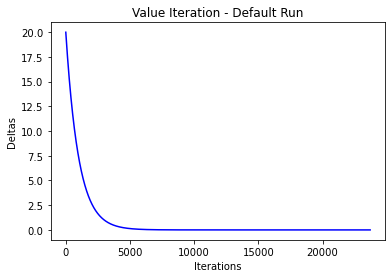

In [93]:
plt.plot(its, deltas)
plt.title("Value Iteration - Default Run")
plt.xlabel("Iterations")
plt.ylabel("Deltas")

In [95]:
for i in range(S):
    for j in range(S):
        print(large_map[i][j], " ", end="")
    print()

print()

for i in range(S):
    for j in range(S):
        print(vi.policy[S*i+j], " ", end="")
    print()
    
# LEFT = 0
# DOWN = 1
# RIGHT = 2
# UP = 3

S  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  H  H  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  H  F  F  F  F  F  F  H  F  F  F  
F  F  F  F  H  F  F  F  F  F  F  F  H  F  H  H  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  H  F  
F  H  F  F  F  F  F  F  H  F  F  F  F  F  F  F  
H  F  F  F  F  F  F  F  F  H  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  H  F  F  
F  F  F  F  F  H  F  F  F  F  F  F  F  H  F  F  
H  F  H  F  F  H  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  F  F  H  F  F  F  F  F  F  H  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  H  F  F  H  F  F  F  F  F  F  F  F  H  G  

1  2  2  2  3  3  3  2  2  2  0  0  0  0  0  3  
1  1  1  0  0  0  0  2  1  1  1  0  3  3  3  3  
1  1  1  0  0  0  1  2  1  1  1  0  0  2  3  3  
1  1  1  0  0  1  2  2  1  1  1  0  0  0  0  0  
1  1  1  1  1  1  1

In [96]:
vi_traj;

##### Run over multiple discount factors

In [97]:
disc_fac_range = [i / 10 for i in range(1, 10, 1)]
disc_fac_range.append(0.93)
disc_fac_range.append(0.95)
disc_fac_range.append(0.97)

 Iteration   Variation
         1   20.000000
         2    2.000000
         3    0.200000
         4    0.020000
         5    0.002000
         6    0.000200
         7    0.000020
Iterating stopped due to maximum number of iterations condition.
disc_fact: 0.1
0  0  0  0  3  3  3  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  2  0  0  0  0  3  3  3  3  
0  0  0  0  0  0  2  2  0  0  0  0  0  2  3  3  
0  0  0  0  0  1  1  2  0  0  0  0  0  0  0  0  
0  0  0  0  1  1  1  0  0  0  0  0  1  1  1  1  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  
3  3  0  0  0  0  0  0  3  3  0  0  0  0  0  2  
0  0  2  0  0  0  0  0  0  2  2  0  0  0  1  0  
0  1  2  0  0  0  0  0  0  0  2  0  0  3  1  1  
1  1  0  0  0  3  0  0  1  1  0  0  0  0  2  1  
3  3  3  0  0  0  2  0  0  0  0  0  0  0  2  1  
0  0  0  2  0  0  2  3  0  0  0  1  1  1  3  2  
1  1  1  0  0  1  0  0  2  0  0  0  2  0  0  2  
0  0  3  0  0  3  0  1  0  0  0  0  0  0  1  2  
0

        10    2.684355
        11    2.147484
        12    1.717987
        13    1.374390
        14    1.099512
        15    0.879609
        16    0.703687
        17    0.562950
        18    0.450360
        19    0.360288
        20    0.288230
        21    0.230584
        22    0.184467
        23    0.147574
        24    0.118059
        25    0.094447
        26    0.075558
        27    0.060446
        28    0.048357
        29    0.038686
        30    0.030949
        31    0.024759
        32    0.019807
        33    0.015846
        34    0.012677
        35    0.010141
        36    0.008113
        37    0.006490
        38    0.005192
        39    0.004154
        40    0.003323
        41    0.002658
        42    0.002127
        43    0.001701
        44    0.001361
        45    0.001089
        46    0.000871
        47    0.000697
        48    0.000558
        49    0.000446
        50    0.000357
        51    0.000285
        52    0.000228
        53 

       197    0.000013
       198    0.000012
       199    0.000011
       200    0.000011
       201    0.000010
       202    0.000009
       203    0.000009
       204    0.000008
       205    0.000007
       206    0.000007
       207    0.000006
       208    0.000006
       209    0.000006
       210    0.000005
       211    0.000005
       212    0.000004
       213    0.000004
       214    0.000004
       215    0.000004
       216    0.000003
       217    0.000003
       218    0.000003
       219    0.000003
       220    0.000003
       221    0.000002
       222    0.000002
       223    0.000002
       224    0.000002
       225    0.000002
       226    0.000002
       227    0.000002
       228    0.000001
       229    0.000001
       230    0.000001
       231    0.000001
       232    0.000001
       233    0.000001
       234    0.000001
       235    0.000001
       236    0.000001
       237    0.000001
       238    0.000001
       239    0.000001
       240 

2  0  0  2  0  0  2  2  2  2  2  2  2  0  0  0  

 Iteration   Variation
         1   20.000000
         2   19.400000
         3   18.818000
         4   18.253460
         5   17.705856
         6   17.174681
         7   16.659440
         8   16.159657
         9   15.674867
        10   15.204621
        11   14.748483
        12   14.306028
        13   13.876847
        14   13.460542
        15   13.056726
        16   12.665024
        17   12.285073
        18   11.916521
        19   11.559025
        20   11.212254
        21   10.875887
        22   10.549610
        23   10.233122
        24    9.926128
        25    9.628344
        26    9.339494
        27    9.059309
        28    8.787530
        29    8.523904
        30    8.268187
        31    8.020141
        32    7.779537
        33    7.546151
        34    7.319766
        35    7.100173
        36    6.887168
        37    6.680553
        38    6.480137
        39    6.285733
        40    6.097161
       

1  2  2  2  3  3  3  2  2  2  0  0  0  0  0  3  
1  1  1  0  0  0  0  2  1  1  1  0  3  3  3  3  
1  1  1  0  0  0  1  2  1  1  1  0  0  2  3  3  
1  1  1  0  0  1  2  2  1  1  1  0  0  0  0  0  
1  1  1  1  1  1  1  2  2  1  1  1  1  1  1  1  
1  2  2  2  2  2  2  2  2  2  2  1  1  1  1  1  
1  2  2  2  2  2  2  2  2  2  2  1  1  1  3  2  
3  3  2  2  2  2  2  2  3  3  2  2  1  0  0  2  
0  0  2  2  2  2  2  0  0  2  2  2  2  1  1  1  
0  1  2  2  2  2  2  0  0  0  2  2  2  3  2  1  
1  1  2  2  3  3  2  1  1  1  2  2  0  0  2  1  
3  3  3  2  0  0  2  2  2  2  2  2  0  0  2  1  
0  0  0  2  0  0  2  3  2  2  2  2  2  1  3  2  
1  1  1  2  2  1  0  0  2  2  2  2  3  0  0  2  
3  3  3  2  3  3  2  1  2  2  2  2  3  0  1  2  
2  0  0  2  0  0  2  2  2  2  2  2  2  0  0  0  

Total time: 0.2015094757080078


Text(0, 0.5, 'Delta')

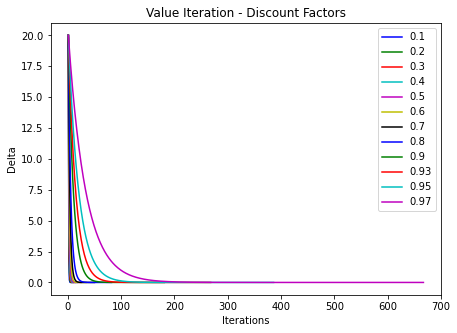

In [98]:
plt.figure(figsize=(7,5))
for i in disc_fac_range:
    vi = mdp.ValueIteration(P, R, i, max_iter=max_iter, epsilon=eps)
    vi.setVerbose()
    vi_traj = vi.run()
    print("disc_fact:", i)
    print_policy(vi.policy,S)
    print()
    its, deltas, times, rewards = parsetraj(vi_traj)
    a = plt.plot(its, deltas, label=f"{i}");
    
print("Total time:", vi_traj[-1]['Time'])
plt.legend();
# ymax = (10-1)*r2+r1+4;
# plt.yticks(range(0, ymax, 2));
plt.title("Value Iteration - Discount Factors")
plt.xlabel("Iterations")
plt.ylabel("Delta")

In [ ]:
# LEFT = 0
# DOWN = 1
# RIGHT = 2
# UP = 3

##### Run over multiple sizes of the env

In [105]:
map_sizes = range(3, 31, 3)

['SFF', 'FFF', 'FFG']
 Iteration   Variation
         1   10.100000
         2    9.999000
         3    9.899010
         4    9.074092
         5    8.104979
         6    7.048937
         7    6.074075
         8    5.195487
         9    4.434242
        10    3.778642
        11    3.219243
        12    2.742222
        13    2.336131
        14    1.990288
        15    1.695783
        16    1.444918
        17    1.231208
        18    1.049125
        19    0.893980
        20    0.761782
        21    0.649134
        22    0.553145
        23    0.471350
        24    0.401651
        25    0.342258
        26    0.291647
        27    0.248521
        28    0.211772
        29    0.180456
        30    0.153772
        31    0.131033
        32    0.111657
        33    0.095146
        34    0.081077
        35    0.069088
        36    0.058871
        37    0.050166
        38    0.042748
        39    0.036427
        40    0.031040
        41    0.026450
        42  

       979    0.001077
       980    0.001066
       981    0.001056
       982    0.001045
       983    0.001035
       984    0.001024
       985    0.001014
       986    0.001004
       987    0.000994
       988    0.000984
       989    0.000974
       990    0.000964
       991    0.000955
       992    0.000945
       993    0.000936
       994    0.000926
       995    0.000917
       996    0.000908
       997    0.000899
       998    0.000890
       999    0.000881
      1000    0.000872
      1001    0.000863
      1002    0.000855
      1003    0.000846
      1004    0.000838
      1005    0.000829
      1006    0.000821
      1007    0.000813
      1008    0.000805
      1009    0.000797
      1010    0.000789
      1011    0.000781
      1012    0.000773
      1013    0.000765
      1014    0.000758
      1015    0.000750
      1016    0.000743
      1017    0.000735
      1018    0.000728
      1019    0.000721
      1020    0.000713
      1021    0.000706
      1022 

        86    8.511802
        87    8.426684
        88    8.342418
        89    8.258993
        90    8.176403
        91    8.094639
        92    8.013693
        93    7.933556
        94    7.854221
        95    7.775678
        96    7.697922
        97    7.620942
        98    7.544733
        99    7.469286
       100    7.394593
       101    7.320647
       102    7.247440
       103    7.174966
       104    7.103216
       105    7.032184
       106    6.961862
       107    6.892244
       108    6.823321
       109    6.755088
       110    6.687537
       111    6.620662
       112    6.554455
       113    6.488911
       114    6.424021
       115    6.359781
       116    6.296183
       117    6.233222
       118    6.170889
       119    6.109181
       120    6.048089
       121    5.987608
       122    5.927732
       123    5.868454
       124    5.809770
       125    5.751672
       126    5.694155
       127    5.637214
       128    5.580842
       129 

      1327    0.000033
      1328    0.000032
      1329    0.000032
      1330    0.000032
      1331    0.000031
      1332    0.000031
      1333    0.000031
      1334    0.000030
      1335    0.000030
      1336    0.000030
      1337    0.000029
      1338    0.000029
      1339    0.000029
      1340    0.000029
      1341    0.000028
      1342    0.000028
      1343    0.000028
      1344    0.000027
      1345    0.000027
      1346    0.000027
      1347    0.000027
      1348    0.000026
      1349    0.000026
      1350    0.000026
      1351    0.000026
      1352    0.000025
      1353    0.000025
      1354    0.000025
      1355    0.000025
      1356    0.000024
      1357    0.000024
      1358    0.000024
      1359    0.000024
      1360    0.000023
      1361    0.000023
      1362    0.000023
      1363    0.000023
      1364    0.000022
      1365    0.000022
      1366    0.000022
      1367    0.000022
      1368    0.000022
      1369    0.000021
      1370 

       192    2.933271
       193    2.903938
       194    2.874899
       195    2.846150
       196    2.817688
       197    2.789511
       198    2.761616
       199    2.734000
       200    2.706660
       201    2.679593
       202    2.652798
       203    2.626270
       204    2.600007
       205    2.574007
       206    2.548267
       207    2.522784
       208    2.497556
       209    2.472581
       210    2.447855
       211    2.423376
       212    2.399143
       213    2.375151
       214    2.351400
       215    2.327886
       216    2.304607
       217    2.281561
       218    2.258745
       219    2.236158
       220    2.213796
       221    2.191658
       222    2.169742
       223    2.148044
       224    2.126564
       225    2.105298
       226    2.084245
       227    2.063403
       228    2.042769
       229    2.022341
       230    2.002117
       231    1.982096
       232    1.962275
       233    1.942653
       234    1.923226
       235 

      1352    0.000025
      1353    0.000025
      1354    0.000025
      1355    0.000025
      1356    0.000024
      1357    0.000024
      1358    0.000024
      1359    0.000024
      1360    0.000023
      1361    0.000023
      1362    0.000023
      1363    0.000023
      1364    0.000022
      1365    0.000022
      1366    0.000022
      1367    0.000022
      1368    0.000022
      1369    0.000021
      1370    0.000021
      1371    0.000021
      1372    0.000021
      1373    0.000021
      1374    0.000020
      1375    0.000020
      1376    0.000020
      1377    0.000020
      1378    0.000020
      1379    0.000019
      1380    0.000019
      1381    0.000019
      1382    0.000019
      1383    0.000019
      1384    0.000018
      1385    0.000018
      1386    0.000018
      1387    0.000018
      1388    0.000018
      1389    0.000017
      1390    0.000017
      1391    0.000017
      1392    0.000017
      1393    0.000017
      1394    0.000017
      1395 

 Iteration   Variation
         1   20.000000
         2   19.800000
         3   19.602000
         4   19.405980
         5   19.211920
         6   19.019801
         7   18.829603
         8   18.641307
         9   18.454894
        10   18.270345
        11   18.087642
        12   17.906765
        13   17.727697
        14   17.550420
        15   17.374916
        16   17.201167
        17   17.029155
        18   16.858864
        19   16.690275
        20   16.523372
        21   16.358139
        22   16.194557
        23   16.032612
        24   15.872286
        25   15.713563
        26   15.556427
        27   15.400863
        28   15.246854
        29   15.094386
        30   14.943442
        31   14.794007
        32   14.646067
        33   14.499607
        34   14.354611
        35   14.211065
        36   14.068954
        37   13.928264
        38   13.788982
        39   13.651092
        40   13.514581
        41   13.379435
        42   13.245641
        43 

       793    0.006984
       794    0.006914
       795    0.006845
       796    0.006777
       797    0.006709
       798    0.006642
       799    0.006575
       800    0.006510
       801    0.006444
       802    0.006380
       803    0.006316
       804    0.006253
       805    0.006191
       806    0.006129
       807    0.006067
       808    0.006007
       809    0.005947
       810    0.005887
       811    0.005828
       812    0.005770
       813    0.005712
       814    0.005655
       815    0.005599
       816    0.005543
       817    0.005487
       818    0.005432
       819    0.005378
       820    0.005324
       821    0.005271
       822    0.005218
       823    0.005166
       824    0.005114
       825    0.005063
       826    0.005013
       827    0.004963
       828    0.004913
       829    0.004864
       830    0.004815
       831    0.004767
       832    0.004719
       833    0.004672
       834    0.004625
       835    0.004579
       836 

      1805    0.000000
      1806    0.000000
      1807    0.000000
      1808    0.000000
      1809    0.000000
      1810    0.000000
      1811    0.000000
      1812    0.000000
      1813    0.000000
      1814    0.000000
      1815    0.000000
      1816    0.000000
      1817    0.000000
      1818    0.000000
      1819    0.000000
      1820    0.000000
      1821    0.000000
      1822    0.000000
      1823    0.000000
      1824    0.000000
      1825    0.000000
      1826    0.000000
      1827    0.000000
      1828    0.000000
      1829    0.000000
      1830    0.000000
      1831    0.000000
      1832    0.000000
      1833    0.000000
      1834    0.000000
      1835    0.000000
      1836    0.000000
      1837    0.000000
      1838    0.000000
      1839    0.000000
      1840    0.000000
      1841    0.000000
      1842    0.000000
      1843    0.000000
      1844    0.000000
      1845    0.000000
      1846    0.000000
      1847    0.000000
      1848 

       194    2.874899
       195    2.846150
       196    2.817688
       197    2.789511
       198    2.761616
       199    2.734000
       200    2.706660
       201    2.679593
       202    2.652798
       203    2.626270
       204    2.600007
       205    2.574007
       206    2.548267
       207    2.522784
       208    2.497556
       209    2.472581
       210    2.447855
       211    2.423376
       212    2.399143
       213    2.375151
       214    2.351400
       215    2.327886
       216    2.304607
       217    2.281561
       218    2.258745
       219    2.236158
       220    2.213796
       221    2.191658
       222    2.169742
       223    2.148044
       224    2.126564
       225    2.105298
       226    2.084245
       227    2.063403
       228    2.042769
       229    2.022341
       230    2.002117
       231    1.982096
       232    1.962275
       233    1.942653
       234    1.923226
       235    1.903994
       236    1.884954
       237 

      1049    0.000533
      1050    0.000528
      1051    0.000522
      1052    0.000517
      1053    0.000512
      1054    0.000507
      1055    0.000502
      1056    0.000497
      1057    0.000492
      1058    0.000487
      1059    0.000482
      1060    0.000477
      1061    0.000472
      1062    0.000468
      1063    0.000463
      1064    0.000458
      1065    0.000454
      1066    0.000449
      1067    0.000445
      1068    0.000440
      1069    0.000436
      1070    0.000432
      1071    0.000427
      1072    0.000423
      1073    0.000419
      1074    0.000415
      1075    0.000410
      1076    0.000406
      1077    0.000402
      1078    0.000398
      1079    0.000394
      1080    0.000390
      1081    0.000386
      1082    0.000383
      1083    0.000379
      1084    0.000375
      1085    0.000371
      1086    0.000367
      1087    0.000364
      1088    0.000360
      1089    0.000357
      1090    0.000353
      1091    0.000349
      1092 

      1623    0.000002
      1624    0.000002
      1625    0.000002
      1626    0.000002
      1627    0.000002
      1628    0.000002
      1629    0.000002
      1630    0.000002
      1631    0.000002
      1632    0.000002
      1633    0.000002
      1634    0.000001
      1635    0.000001
      1636    0.000001
      1637    0.000001
      1638    0.000001
      1639    0.000001
      1640    0.000001
      1641    0.000001
      1642    0.000001
      1643    0.000001
      1644    0.000001
      1645    0.000001
      1646    0.000001
      1647    0.000001
      1648    0.000001
      1649    0.000001
      1650    0.000001
      1651    0.000001
      1652    0.000001
      1653    0.000001
      1654    0.000001
      1655    0.000001
      1656    0.000001
      1657    0.000001
      1658    0.000001
      1659    0.000001
      1660    0.000001
      1661    0.000001
      1662    0.000001
      1663    0.000001
      1664    0.000001
      1665    0.000001
      1666 

       126    5.694155
       127    5.637214
       128    5.580842
       129    5.525033
       130    5.469783
       131    5.415085
       132    5.360934
       133    5.307325
       134    5.254252
       135    5.201709
       136    5.149692
       137    5.098195
       138    5.047213
       139    4.996741
       140    4.946774
       141    4.897306
       142    4.848333
       143    4.799850
       144    4.751851
       145    4.704333
       146    4.657289
       147    4.610716
       148    4.564609
       149    4.518963
       150    4.473773
       151    4.429036
       152    4.384745
       153    4.340898
       154    4.297489
       155    4.254514
       156    4.211969
       157    4.169849
       158    4.128151
       159    4.086869
       160    4.046001
       161    4.005541
       162    3.965485
       163    3.925830
       164    3.886572
       165    3.847706
       166    3.809229
       167    3.771137
       168    3.733426
       169 

       659    0.026853
       660    0.026584
       661    0.026318
       662    0.026055
       663    0.025795
       664    0.025537
       665    0.025281
       666    0.025028
       667    0.024778
       668    0.024530
       669    0.024285
       670    0.024042
       671    0.023802
       672    0.023564
       673    0.023328
       674    0.023095
       675    0.022864
       676    0.022635
       677    0.022409
       678    0.022185
       679    0.021963
       680    0.021743
       681    0.021526
       682    0.021311
       683    0.021098
       684    0.020887
       685    0.020678
       686    0.020471
       687    0.020266
       688    0.020064
       689    0.019863
       690    0.019664
       691    0.019468
       692    0.019273
       693    0.019080
       694    0.018889
       695    0.018701
       696    0.018514
       697    0.018328
       698    0.018145
       699    0.017964
       700    0.017784
       701    0.017606
       702 

      1199    0.000118
      1200    0.000117
      1201    0.000116
      1202    0.000115
      1203    0.000113
      1204    0.000112
      1205    0.000111
      1206    0.000110
      1207    0.000109
      1208    0.000108
      1209    0.000107
      1210    0.000106
      1211    0.000105
      1212    0.000104
      1213    0.000103
      1214    0.000102
      1215    0.000100
      1216    0.000099
      1217    0.000098
      1218    0.000098
      1219    0.000097
      1220    0.000096
      1221    0.000095
      1222    0.000094
      1223    0.000093
      1224    0.000092
      1225    0.000091
      1226    0.000090
      1227    0.000089
      1228    0.000088
      1229    0.000087
      1230    0.000086
      1231    0.000086
      1232    0.000085
      1233    0.000084
      1234    0.000083
      1235    0.000082
      1236    0.000081
      1237    0.000081
      1238    0.000080
      1239    0.000079
      1240    0.000078
      1241    0.000077
      1242 

      1609    0.000002
      1610    0.000002
      1611    0.000002
      1612    0.000002
      1613    0.000002
      1614    0.000002
      1615    0.000002
      1616    0.000002
      1617    0.000002
      1618    0.000002
      1619    0.000002
      1620    0.000002
      1621    0.000002
      1622    0.000002
      1623    0.000002
      1624    0.000002
      1625    0.000002
      1626    0.000002
      1627    0.000002
      1628    0.000002
      1629    0.000002
      1630    0.000002
      1631    0.000002
      1632    0.000002
      1633    0.000002
      1634    0.000001
      1635    0.000001
      1636    0.000001
      1637    0.000001
      1638    0.000001
      1639    0.000001
      1640    0.000001
      1641    0.000001
      1642    0.000001
      1643    0.000001
      1644    0.000001
      1645    0.000001
      1646    0.000001
      1647    0.000001
      1648    0.000001
      1649    0.000001
      1650    0.000001
      1651    0.000001
      1652 

      2029    0.000000
      2030    0.000000
      2031    0.000000
      2032    0.000000
      2033    0.000000
      2034    0.000000
      2035    0.000000
      2036    0.000000
      2037    0.000000
      2038    0.000000
      2039    0.000000
      2040    0.000000
      2041    0.000000
      2042    0.000000
      2043    0.000000
      2044    0.000000
      2045    0.000000
      2046    0.000000
      2047    0.000000
      2048    0.000000
      2049    0.000000
      2050    0.000000
      2051    0.000000
      2052    0.000000
      2053    0.000000
      2054    0.000000
      2055    0.000000
      2056    0.000000
      2057    0.000000
      2058    0.000000
      2059    0.000000
      2060    0.000000
      2061    0.000000
      2062    0.000000
      2063    0.000000
      2064    0.000000
      2065    0.000000
      2066    0.000000
      2067    0.000000
      2068    0.000000
      2069    0.000000
      2070    0.000000
      2071    0.000000
      2072 

       412    0.321436
       413    0.318222
       414    0.315040
       415    0.311889
       416    0.308770
       417    0.305683
       418    0.302626
       419    0.299600
       420    0.296604
       421    0.293638
       422    0.290701
       423    0.287794
       424    0.284916
       425    0.282067
       426    0.279246
       427    0.276454
       428    0.273689
       429    0.270953
       430    0.268243
       431    0.265561
       432    0.262905
       433    0.260276
       434    0.257673
       435    0.255096
       436    0.252546
       437    0.250020
       438    0.247520
       439    0.245045
       440    0.242594
       441    0.240168
       442    0.237767
       443    0.235389
       444    0.233035
       445    0.230705
       446    0.228398
       447    0.226114
       448    0.223853
       449    0.221614
       450    0.219398
       451    0.217204
       452    0.215032
       453    0.212882
       454    0.210753
       455 

      1074    0.000415
      1075    0.000410
      1076    0.000406
      1077    0.000402
      1078    0.000398
      1079    0.000394
      1080    0.000390
      1081    0.000386
      1082    0.000383
      1083    0.000379
      1084    0.000375
      1085    0.000371
      1086    0.000367
      1087    0.000364
      1088    0.000360
      1089    0.000357
      1090    0.000353
      1091    0.000349
      1092    0.000346
      1093    0.000343
      1094    0.000339
      1095    0.000336
      1096    0.000332
      1097    0.000329
      1098    0.000326
      1099    0.000322
      1100    0.000319
      1101    0.000316
      1102    0.000313
      1103    0.000310
      1104    0.000307
      1105    0.000304
      1106    0.000301
      1107    0.000298
      1108    0.000295
      1109    0.000292
      1110    0.000289
      1111    0.000286
      1112    0.000283
      1113    0.000280
      1114    0.000277
      1115    0.000275
      1116    0.000272
      1117 

      1701    0.000001
      1702    0.000001
      1703    0.000001
      1704    0.000001
      1705    0.000001
      1706    0.000001
      1707    0.000001
      1708    0.000001
      1709    0.000001
      1710    0.000001
      1711    0.000001
      1712    0.000001
      1713    0.000001
      1714    0.000001
      1715    0.000001
      1716    0.000001
      1717    0.000001
      1718    0.000001
      1719    0.000001
      1720    0.000001
      1721    0.000001
      1722    0.000001
      1723    0.000001
      1724    0.000001
      1725    0.000001
      1726    0.000001
      1727    0.000001
      1728    0.000001
      1729    0.000001
      1730    0.000001
      1731    0.000001
      1732    0.000001
      1733    0.000001
      1734    0.000001
      1735    0.000001
      1736    0.000001
      1737    0.000001
      1738    0.000001
      1739    0.000001
      1740    0.000001
      1741    0.000001
      1742    0.000001
      1743    0.000000
      1744 

        12   17.906765
        13   17.727697
        14   17.550420
        15   17.374916
        16   17.201167
        17   17.029155
        18   16.858864
        19   16.690275
        20   16.523372
        21   16.358139
        22   16.194557
        23   16.032612
        24   15.872286
        25   15.713563
        26   15.556427
        27   15.400863
        28   15.246854
        29   15.094386
        30   14.943442
        31   14.794007
        32   14.646067
        33   14.499607
        34   14.354611
        35   14.211065
        36   14.068954
        37   13.928264
        38   13.788982
        39   13.651092
        40   13.514581
        41   13.379435
        42   13.245641
        43   13.113184
        44   12.982053
        45   12.852232
        46   12.723710
        47   12.596473
        48   12.470508
        49   12.345803
        50   12.222345
        51   12.100121
        52   11.979120
        53   11.859329
        54   11.740736
        55 

       438    0.247520
       439    0.245045
       440    0.242594
       441    0.240168
       442    0.237767
       443    0.235389
       444    0.233035
       445    0.230705
       446    0.228398
       447    0.226114
       448    0.223853
       449    0.221614
       450    0.219398
       451    0.217204
       452    0.215032
       453    0.212882
       454    0.210753
       455    0.208645
       456    0.206559
       457    0.204493
       458    0.202448
       459    0.200424
       460    0.198419
       461    0.196435
       462    0.194471
       463    0.192526
       464    0.190601
       465    0.188695
       466    0.186808
       467    0.184940
       468    0.183091
       469    0.181260
       470    0.179447
       471    0.177653
       472    0.175876
       473    0.174117
       474    0.172376
       475    0.170652
       476    0.168946
       477    0.167256
       478    0.165584
       479    0.163928
       480    0.162289
       481 

       893    0.002556
       894    0.002531
       895    0.002505
       896    0.002480
       897    0.002456
       898    0.002431
       899    0.002407
       900    0.002383
       901    0.002359
       902    0.002335
       903    0.002312
       904    0.002289
       905    0.002266
       906    0.002243
       907    0.002221
       908    0.002199
       909    0.002177
       910    0.002155
       911    0.002133
       912    0.002112
       913    0.002091
       914    0.002070
       915    0.002049
       916    0.002029
       917    0.002008
       918    0.001988
       919    0.001969
       920    0.001949
       921    0.001929
       922    0.001910
       923    0.001891
       924    0.001872
       925    0.001853
       926    0.001835
       927    0.001816
       928    0.001798
       929    0.001780
       930    0.001762
       931    0.001745
       932    0.001727
       933    0.001710
       934    0.001693
       935    0.001676
       936 

      1317    0.000036
      1318    0.000036
      1319    0.000035
      1320    0.000035
      1321    0.000035
      1322    0.000034
      1323    0.000034
      1324    0.000034
      1325    0.000033
      1326    0.000033
      1327    0.000033
      1328    0.000032
      1329    0.000032
      1330    0.000032
      1331    0.000031
      1332    0.000031
      1333    0.000031
      1334    0.000030
      1335    0.000030
      1336    0.000030
      1337    0.000029
      1338    0.000029
      1339    0.000029
      1340    0.000029
      1341    0.000028
      1342    0.000028
      1343    0.000028
      1344    0.000027
      1345    0.000027
      1346    0.000027
      1347    0.000027
      1348    0.000026
      1349    0.000026
      1350    0.000026
      1351    0.000026
      1352    0.000025
      1353    0.000025
      1354    0.000025
      1355    0.000025
      1356    0.000024
      1357    0.000024
      1358    0.000024
      1359    0.000024
      1360 

      1806    0.000000
      1807    0.000000
      1808    0.000000
      1809    0.000000
      1810    0.000000
      1811    0.000000
      1812    0.000000
      1813    0.000000
      1814    0.000000
      1815    0.000000
      1816    0.000000
      1817    0.000000
      1818    0.000000
      1819    0.000000
      1820    0.000000
      1821    0.000000
      1822    0.000000
      1823    0.000000
      1824    0.000000
      1825    0.000000
      1826    0.000000
      1827    0.000000
      1828    0.000000
      1829    0.000000
      1830    0.000000
      1831    0.000000
      1832    0.000000
      1833    0.000000
      1834    0.000000
      1835    0.000000
      1836    0.000000
      1837    0.000000
      1838    0.000000
      1839    0.000000
      1840    0.000000
      1841    0.000000
      1842    0.000000
      1843    0.000000
      1844    0.000000
      1845    0.000000
      1846    0.000000
      1847    0.000000
      1848    0.000000
      1849 

 Iteration   Variation
         1   20.000000
         2   19.800000
         3   19.602000
         4   19.405980
         5   19.211920
         6   19.019801
         7   18.829603
         8   18.641307
         9   18.454894
        10   18.270345
        11   18.087642
        12   17.906765
        13   17.727697
        14   17.550420
        15   17.374916
        16   17.201167
        17   17.029155
        18   16.858864
        19   16.690275
        20   16.523372
        21   16.358139
        22   16.194557
        23   16.032612
        24   15.872286
        25   15.713563
        26   15.556427
        27   15.400863
        28   15.246854
        29   15.094386
        30   14.943442
        31   14.794007
        32   14.646067
        33   14.499607
        34   14.354611
        35   14.211065
        36   14.068954
        37   13.928264
        38   13.788982
        39   13.651092
        40   13.514581
        41   13.379435
        42   13.245641
        43 

       379    0.447851
       380    0.443372
       381    0.438939
       382    0.434549
       383    0.430204
       384    0.425902
       385    0.421643
       386    0.417426
       387    0.413252
       388    0.409120
       389    0.405028
       390    0.400978
       391    0.396968
       392    0.392999
       393    0.389069
       394    0.385178
       395    0.381326
       396    0.377513
       397    0.373738
       398    0.370000
       399    0.366300
       400    0.362637
       401    0.359011
       402    0.355421
       403    0.351867
       404    0.348348
       405    0.344865
       406    0.341416
       407    0.338002
       408    0.334622
       409    0.331276
       410    0.327963
       411    0.324683
       412    0.321436
       413    0.318222
       414    0.315040
       415    0.311889
       416    0.308770
       417    0.305683
       418    0.302626
       419    0.299600
       420    0.296604
       421    0.293638
       422 

       819    0.005378
       820    0.005324
       821    0.005271
       822    0.005218
       823    0.005166
       824    0.005114
       825    0.005063
       826    0.005013
       827    0.004963
       828    0.004913
       829    0.004864
       830    0.004815
       831    0.004767
       832    0.004719
       833    0.004672
       834    0.004625
       835    0.004579
       836    0.004533
       837    0.004488
       838    0.004443
       839    0.004399
       840    0.004355
       841    0.004311
       842    0.004268
       843    0.004225
       844    0.004183
       845    0.004141
       846    0.004100
       847    0.004059
       848    0.004018
       849    0.003978
       850    0.003938
       851    0.003899
       852    0.003860
       853    0.003821
       854    0.003783
       855    0.003745
       856    0.003708
       857    0.003671
       858    0.003634
       859    0.003598
       860    0.003562
       861    0.003526
       862 

      1184    0.000137
      1185    0.000136
      1186    0.000135
      1187    0.000133
      1188    0.000132
      1189    0.000131
      1190    0.000129
      1191    0.000128
      1192    0.000127
      1193    0.000125
      1194    0.000124
      1195    0.000123
      1196    0.000122
      1197    0.000120
      1198    0.000119
      1199    0.000118
      1200    0.000117
      1201    0.000116
      1202    0.000115
      1203    0.000113
      1204    0.000112
      1205    0.000111
      1206    0.000110
      1207    0.000109
      1208    0.000108
      1209    0.000107
      1210    0.000106
      1211    0.000105
      1212    0.000104
      1213    0.000103
      1214    0.000102
      1215    0.000100
      1216    0.000099
      1217    0.000098
      1218    0.000098
      1219    0.000097
      1220    0.000096
      1221    0.000095
      1222    0.000094
      1223    0.000093
      1224    0.000092
      1225    0.000091
      1226    0.000090
      1227 

      1561    0.000003
      1562    0.000003
      1563    0.000003
      1564    0.000003
      1565    0.000003
      1566    0.000003
      1567    0.000003
      1568    0.000003
      1569    0.000003
      1570    0.000003
      1571    0.000003
      1572    0.000003
      1573    0.000003
      1574    0.000003
      1575    0.000003
      1576    0.000003
      1577    0.000003
      1578    0.000003
      1579    0.000003
      1580    0.000003
      1581    0.000003
      1582    0.000003
      1583    0.000002
      1584    0.000002
      1585    0.000002
      1586    0.000002
      1587    0.000002
      1588    0.000002
      1589    0.000002
      1590    0.000002
      1591    0.000002
      1592    0.000002
      1593    0.000002
      1594    0.000002
      1595    0.000002
      1596    0.000002
      1597    0.000002
      1598    0.000002
      1599    0.000002
      1600    0.000002
      1601    0.000002
      1602    0.000002
      1603    0.000002
      1604 

      2033    0.000000
      2034    0.000000
      2035    0.000000
      2036    0.000000
      2037    0.000000
      2038    0.000000
      2039    0.000000
      2040    0.000000
      2041    0.000000
      2042    0.000000
      2043    0.000000
      2044    0.000000
      2045    0.000000
      2046    0.000000
      2047    0.000000
      2048    0.000000
      2049    0.000000
      2050    0.000000
      2051    0.000000
      2052    0.000000
      2053    0.000000
      2054    0.000000
      2055    0.000000
      2056    0.000000
      2057    0.000000
      2058    0.000000
      2059    0.000000
      2060    0.000000
      2061    0.000000
      2062    0.000000
      2063    0.000000
      2064    0.000000
      2065    0.000000
      2066    0.000000
      2067    0.000000
      2068    0.000000
      2069    0.000000
      2070    0.000000
      2071    0.000000
      2072    0.000000
      2073    0.000000
      2074    0.000000
      2075    0.000000
      2076 

Text(0, 0.5, 'Cumulative Time')

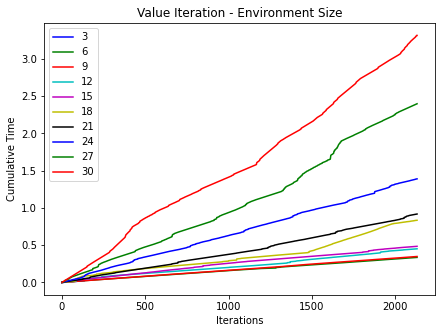

In [109]:
plt.figure(figsize=(7,5))
for i in map_sizes:
    np.random.seed(seed=p2seed)
    large_map = generate_random_map(size=i, p=0.90) #p is prob frozen
    print(large_map)
    env = gym.make("FrozenLake-v0", desc=large_map)
    P, R = gym_to_mdp(env)
    vi = mdp.ValueIteration(P, R, 0.99, max_iter=max_iter, epsilon=eps)
    vi.setVerbose()
    vi_traj = vi.run()
    print("lake size:", i)
    print("policy:", vi.policy)
    print()
    its, deltas, times, rewards = parsetraj(vi_traj)
    a = plt.plot(its, times, label=f"{i}");
    
print("Total time:", vi_traj[-1]['Time'])
plt.legend();
plt.title("Value Iteration - Environment Size")
plt.xlabel("Iterations")
plt.ylabel("Cumulative Time")

##### Run over multiple probabilities of frozen/holes

In [110]:
frozen_prob = [i / 10 for i in range(4, 10, 1)] + [0.95, 0.99]
S = 16

 Iteration   Variation
         1   20.000000
         2   19.800000
         3   19.602000
         4   19.405980
         5   19.211920
         6   19.019801
         7   18.829603
         8   18.641307
         9   18.454894
        10   18.270345
        11   18.087642
        12   17.906765
        13   17.727697
        14   17.550420
        15   17.374916
        16   17.201167
        17   17.029155
        18   16.858864
        19   16.690275
        20   16.523372
        21   16.358139
        22   16.194557
        23   16.032612
        24   15.872286
        25   15.713563
        26   15.556427
        27   15.400863
        28   15.246854
        29   15.094386
        30   14.943442
        31   14.794007
        32   14.646067
        33   14.499607
        34   14.354611
        35   14.211065
        36   14.068954
        37   13.928264
        38   13.788982
        39   13.651092
        40   13.514581
        41   13.379435
        42   13.245641
        43 

       912    0.002112
       913    0.002091
       914    0.002070
       915    0.002049
       916    0.002029
       917    0.002008
       918    0.001988
       919    0.001969
       920    0.001949
       921    0.001929
       922    0.001910
       923    0.001891
       924    0.001872
       925    0.001853
       926    0.001835
       927    0.001816
       928    0.001798
       929    0.001780
       930    0.001762
       931    0.001745
       932    0.001727
       933    0.001710
       934    0.001693
       935    0.001676
       936    0.001659
       937    0.001643
       938    0.001626
       939    0.001610
       940    0.001594
       941    0.001578
       942    0.001562
       943    0.001547
       944    0.001531
       945    0.001516
       946    0.001501
       947    0.001486
       948    0.001471
       949    0.001456
       950    0.001442
       951    0.001427
       952    0.001413
       953    0.001399
       954    0.001385
       955 

      1653    0.000001
      1654    0.000001
      1655    0.000001
      1656    0.000001
      1657    0.000001
      1658    0.000001
      1659    0.000001
      1660    0.000001
      1661    0.000001
      1662    0.000001
      1663    0.000001
      1664    0.000001
      1665    0.000001
      1666    0.000001
      1667    0.000001
      1668    0.000001
      1669    0.000001
      1670    0.000001
      1671    0.000001
      1672    0.000001
      1673    0.000001
      1674    0.000001
      1675    0.000001
      1676    0.000001
      1677    0.000001
      1678    0.000001
      1679    0.000001
      1680    0.000001
      1681    0.000001
      1682    0.000001
      1683    0.000001
      1684    0.000001
      1685    0.000001
      1686    0.000001
      1687    0.000001
      1688    0.000001
      1689    0.000001
      1690    0.000001
      1691    0.000001
      1692    0.000001
      1693    0.000001
      1694    0.000001
      1695    0.000001
      1696 

 Iteration   Variation
         1   20.000000
         2   19.800000
         3   19.602000
         4   19.405980
         5   19.211920
         6   19.019801
         7   18.829603
         8   18.641307
         9   18.454894
        10   18.270345
        11   18.087642
        12   17.906765
        13   17.727697
        14   17.550420
        15   17.374916
        16   17.201167
        17   17.029155
        18   16.858864
        19   16.690275
        20   16.523372
        21   16.358139
        22   16.194557
        23   16.032612
        24   15.872286
        25   15.713563
        26   15.556427
        27   15.400863
        28   15.246854
        29   15.094386
        30   14.943442
        31   14.794007
        32   14.646067
        33   14.499607
        34   14.354611
        35   14.211065
        36   14.068954
        37   13.928264
        38   13.788982
        39   13.651092
        40   13.514581
        41   13.379435
        42   13.245641
        43 

       735    0.012510
       736    0.012385
       737    0.012261
       738    0.012139
       739    0.012017
       740    0.011897
       741    0.011778
       742    0.011660
       743    0.011544
       744    0.011428
       745    0.011314
       746    0.011201
       747    0.011089
       748    0.010978
       749    0.010868
       750    0.010759
       751    0.010652
       752    0.010545
       753    0.010440
       754    0.010336
       755    0.010232
       756    0.010130
       757    0.010029
       758    0.009928
       759    0.009829
       760    0.009731
       761    0.009633
       762    0.009537
       763    0.009442
       764    0.009347
       765    0.009254
       766    0.009161
       767    0.009070
       768    0.008979
       769    0.008889
       770    0.008800
       771    0.008712
       772    0.008625
       773    0.008539
       774    0.008453
       775    0.008369
       776    0.008285
       777    0.008202
       778 

      1473    0.000008
      1474    0.000007
      1475    0.000007
      1476    0.000007
      1477    0.000007
      1478    0.000007
      1479    0.000007
      1480    0.000007
      1481    0.000007
      1482    0.000007
      1483    0.000007
      1484    0.000007
      1485    0.000007
      1486    0.000007
      1487    0.000007
      1488    0.000006
      1489    0.000006
      1490    0.000006
      1491    0.000006
      1492    0.000006
      1493    0.000006
      1494    0.000006
      1495    0.000006
      1496    0.000006
      1497    0.000006
      1498    0.000006
      1499    0.000006
      1500    0.000006
      1501    0.000006
      1502    0.000006
      1503    0.000006
      1504    0.000006
      1505    0.000005
      1506    0.000005
      1507    0.000005
      1508    0.000005
      1509    0.000005
      1510    0.000005
      1511    0.000005
      1512    0.000005
      1513    0.000005
      1514    0.000005
      1515    0.000005
      1516 

F  H  H  H  F  F  F  H  H  H  H  H  H  F  F  G  

0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  2  
3  1  1  1  0  0  0  0  0  0  3  0  0  1  0  0  
0  2  0  3  0  0  0  0  0  0  0  0  0  0  0  0  
1  0  0  0  0  0  0  0  0  0  0  0  0  2  1  1  
3  3  0  1  1  1  0  0  0  0  0  0  1  0  0  2  
0  2  3  0  0  2  1  1  1  1  0  0  0  0  0  0  
0  0  2  0  0  2  0  0  2  3  0  0  0  0  0  0  
0  0  0  2  0  0  0  0  0  0  0  1  1  1  1  1  
0  0  0  0  0  0  0  1  3  1  0  0  2  3  0  0  
0  1  0  0  0  0  0  0  0  0  0  0  2  0  0  0  
0  0  0  0  1  0  0  0  1  2  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  2  3  1  1  1  0  0  
0  0  0  0  2  1  1  1  1  3  0  0  0  2  2  1  
0  0  0  0  0  0  0  0  0  0  2  0  0  0  3  3  
0  0  0  0  0  0  0  0  0  0  3  3  1  0  0  0  
0  0  0  0  2  1  0  0  0  0  0  0  0  2  1  0  
(-482.48337126978936, -999.9999994953788, -782.8979306627415, -999.9999994953788, -999.9999994953788, -999.9999994953788, -995.0746263610504, -999.9999994953788, -999

       820    0.005324
       821    0.005271
       822    0.005218
       823    0.005166
       824    0.005114
       825    0.005063
       826    0.005013
       827    0.004963
       828    0.004913
       829    0.004864
       830    0.004815
       831    0.004767
       832    0.004719
       833    0.004672
       834    0.004625
       835    0.004579
       836    0.004533
       837    0.004488
       838    0.004443
       839    0.004399
       840    0.004355
       841    0.004311
       842    0.004268
       843    0.004225
       844    0.004183
       845    0.004141
       846    0.004100
       847    0.004059
       848    0.004018
       849    0.003978
       850    0.003938
       851    0.003899
       852    0.003860
       853    0.003821
       854    0.003783
       855    0.003745
       856    0.003708
       857    0.003671
       858    0.003634
       859    0.003598
       860    0.003562
       861    0.003526
       862    0.003491
       863 

      1661    0.000001
      1662    0.000001
      1663    0.000001
      1664    0.000001
      1665    0.000001
      1666    0.000001
      1667    0.000001
      1668    0.000001
      1669    0.000001
      1670    0.000001
      1671    0.000001
      1672    0.000001
      1673    0.000001
      1674    0.000001
      1675    0.000001
      1676    0.000001
      1677    0.000001
      1678    0.000001
      1679    0.000001
      1680    0.000001
      1681    0.000001
      1682    0.000001
      1683    0.000001
      1684    0.000001
      1685    0.000001
      1686    0.000001
      1687    0.000001
      1688    0.000001
      1689    0.000001
      1690    0.000001
      1691    0.000001
      1692    0.000001
      1693    0.000001
      1694    0.000001
      1695    0.000001
      1696    0.000001
      1697    0.000001
      1698    0.000001
      1699    0.000001
      1700    0.000001
      1701    0.000001
      1702    0.000001
      1703    0.000001
      1704 

        67   10.302742
        68   10.199715
        69   10.097718
        70    9.996741
        71    9.896773
        72    9.797805
        73    9.699827
        74    9.602829
        75    9.506801
        76    9.411733
        77    9.317616
        78    9.224439
        79    9.132195
        80    9.040873
        81    8.950464
        82    8.860960
        83    8.772350
        84    8.684627
        85    8.597780
        86    8.511802
        87    8.426684
        88    8.342418
        89    8.258993
        90    8.176403
        91    8.094639
        92    8.013693
        93    7.933556
        94    7.854221
        95    7.775678
        96    7.697922
        97    7.620942
        98    7.544733
        99    7.469286
       100    7.394593
       101    7.320647
       102    7.247440
       103    7.174966
       104    7.103216
       105    7.032184
       106    6.961862
       107    6.892244
       108    6.823321
       109    6.755088
       110 

       849    0.003978
       850    0.003938
       851    0.003899
       852    0.003860
       853    0.003821
       854    0.003783
       855    0.003745
       856    0.003708
       857    0.003671
       858    0.003634
       859    0.003598
       860    0.003562
       861    0.003526
       862    0.003491
       863    0.003456
       864    0.003421
       865    0.003387
       866    0.003353
       867    0.003320
       868    0.003287
       869    0.003254
       870    0.003221
       871    0.003189
       872    0.003157
       873    0.003126
       874    0.003094
       875    0.003063
       876    0.003033
       877    0.003002
       878    0.002972
       879    0.002943
       880    0.002913
       881    0.002884
       882    0.002855
       883    0.002827
       884    0.002798
       885    0.002770
       886    0.002743
       887    0.002715
       888    0.002688
       889    0.002661
       890    0.002635
       891    0.002608
       892 

      1566    0.000003
      1567    0.000003
      1568    0.000003
      1569    0.000003
      1570    0.000003
      1571    0.000003
      1572    0.000003
      1573    0.000003
      1574    0.000003
      1575    0.000003
      1576    0.000003
      1577    0.000003
      1578    0.000003
      1579    0.000003
      1580    0.000003
      1581    0.000003
      1582    0.000003
      1583    0.000002
      1584    0.000002
      1585    0.000002
      1586    0.000002
      1587    0.000002
      1588    0.000002
      1589    0.000002
      1590    0.000002
      1591    0.000002
      1592    0.000002
      1593    0.000002
      1594    0.000002
      1595    0.000002
      1596    0.000002
      1597    0.000002
      1598    0.000002
      1599    0.000002
      1600    0.000002
      1601    0.000002
      1602    0.000002
      1603    0.000002
      1604    0.000002
      1605    0.000002
      1606    0.000002
      1607    0.000002
      1608    0.000002
      1609 

 Iteration   Variation
         1   20.000000
         2   19.800000
         3   19.602000
         4   19.405980
         5   19.211920
         6   19.019801
         7   18.829603
         8   18.641307
         9   18.454894
        10   18.270345
        11   18.087642
        12   17.906765
        13   17.727697
        14   17.550420
        15   17.374916
        16   17.201167
        17   17.029155
        18   16.858864
        19   16.690275
        20   16.523372
        21   16.358139
        22   16.194557
        23   16.032612
        24   15.872286
        25   15.713563
        26   15.556427
        27   15.400863
        28   15.246854
        29   15.094386
        30   14.943442
        31   14.794007
        32   14.646067
        33   14.499607
        34   14.354611
        35   14.211065
        36   14.068954
        37   13.928264
        38   13.788982
        39   13.651092
        40   13.514581
        41   13.379435
        42   13.245641
        43 

       741    0.011778
       742    0.011660
       743    0.011544
       744    0.011428
       745    0.011314
       746    0.011201
       747    0.011089
       748    0.010978
       749    0.010868
       750    0.010759
       751    0.010652
       752    0.010545
       753    0.010440
       754    0.010336
       755    0.010232
       756    0.010130
       757    0.010029
       758    0.009928
       759    0.009829
       760    0.009731
       761    0.009633
       762    0.009537
       763    0.009442
       764    0.009347
       765    0.009254
       766    0.009161
       767    0.009070
       768    0.008979
       769    0.008889
       770    0.008800
       771    0.008712
       772    0.008625
       773    0.008539
       774    0.008453
       775    0.008369
       776    0.008285
       777    0.008202
       778    0.008120
       779    0.008039
       780    0.007959
       781    0.007879
       782    0.007800
       783    0.007722
       784 

      1518    0.000005
      1519    0.000005
      1520    0.000005
      1521    0.000005
      1522    0.000005
      1523    0.000005
      1524    0.000005
      1525    0.000004
      1526    0.000004
      1527    0.000004
      1528    0.000004
      1529    0.000004
      1530    0.000004
      1531    0.000004
      1532    0.000004
      1533    0.000004
      1534    0.000004
      1535    0.000004
      1536    0.000004
      1537    0.000004
      1538    0.000004
      1539    0.000004
      1540    0.000004
      1541    0.000004
      1542    0.000004
      1543    0.000004
      1544    0.000004
      1545    0.000004
      1546    0.000004
      1547    0.000004
      1548    0.000004
      1549    0.000004
      1550    0.000003
      1551    0.000003
      1552    0.000003
      1553    0.000003
      1554    0.000003
      1555    0.000003
      1556    0.000003
      1557    0.000003
      1558    0.000003
      1559    0.000003
      1560    0.000003
      1561 

F  F  H  F  H  F  F  F  F  F  F  H  F  F  H  F  
F  F  F  F  F  F  H  H  F  F  F  F  F  F  F  F  
H  F  F  F  F  F  F  F  F  F  F  H  F  H  H  F  
F  F  F  F  H  H  F  F  F  F  H  F  F  F  H  H  
F  H  F  F  H  F  F  F  H  F  F  F  F  F  F  H  
H  F  H  H  F  F  F  F  H  H  F  F  F  F  H  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  H  F  F  
H  F  F  F  F  H  F  F  F  F  F  H  F  H  F  F  
H  F  H  F  F  H  F  H  F  F  F  F  F  F  F  F  
F  H  F  F  F  F  F  H  H  H  H  F  F  F  H  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  H  F  F  
F  F  H  F  H  H  F  F  F  F  F  F  H  F  H  G  

3  3  3  3  3  3  3  3  3  0  3  0  0  0  0  2  
0  0  2  0  0  0  0  2  3  0  0  2  1  1  1  2  
0  0  2  0  0  0  1  2  3  0  1  0  0  2  3  3  
0  1  3  0  0  1  2  2  3  0  0  0  0  0  0  0  
0  0  0  0  0  2  3  3  3  0  0  0  1  0  0  1  
3  3  1  1  1  0  0  0  2  0  0  1  1  3  1  1  
0  2  3  3  3  3  1  1  3  0  0  0  0  0  0  2  
1  3  3  0  0  0  2  0  3  0  0  1  1  0  0  0  
0  0  2  0  0  1  2

       790    0.007198
       791    0.007126
       792    0.007055
       793    0.006984
       794    0.006914
       795    0.006845
       796    0.006777
       797    0.006709
       798    0.006642
       799    0.006575
       800    0.006510
       801    0.006444
       802    0.006380
       803    0.006316
       804    0.006253
       805    0.006191
       806    0.006129
       807    0.006067
       808    0.006007
       809    0.005947
       810    0.005887
       811    0.005828
       812    0.005770
       813    0.005712
       814    0.005655
       815    0.005599
       816    0.005543
       817    0.005487
       818    0.005432
       819    0.005378
       820    0.005324
       821    0.005271
       822    0.005218
       823    0.005166
       824    0.005114
       825    0.005063
       826    0.005013
       827    0.004963
       828    0.004913
       829    0.004864
       830    0.004815
       831    0.004767
       832    0.004719
       833 

      1558    0.000003
      1559    0.000003
      1560    0.000003
      1561    0.000003
      1562    0.000003
      1563    0.000003
      1564    0.000003
      1565    0.000003
      1566    0.000003
      1567    0.000003
      1568    0.000003
      1569    0.000003
      1570    0.000003
      1571    0.000003
      1572    0.000003
      1573    0.000003
      1574    0.000003
      1575    0.000003
      1576    0.000003
      1577    0.000003
      1578    0.000003
      1579    0.000003
      1580    0.000003
      1581    0.000003
      1582    0.000003
      1583    0.000002
      1584    0.000002
      1585    0.000002
      1586    0.000002
      1587    0.000002
      1588    0.000002
      1589    0.000002
      1590    0.000002
      1591    0.000002
      1592    0.000002
      1593    0.000002
      1594    0.000002
      1595    0.000002
      1596    0.000002
      1597    0.000002
      1598    0.000002
      1599    0.000002
      1600    0.000002
      1601 

 Iteration   Variation
         1   20.000000
         2   19.800000
         3   19.602000
         4   19.405980
         5   19.211920
         6   19.019801
         7   18.829603
         8   18.641307
         9   18.454894
        10   18.270345
        11   18.087642
        12   17.906765
        13   17.727697
        14   17.550420
        15   17.374916
        16   17.201167
        17   17.029155
        18   16.858864
        19   16.690275
        20   16.523372
        21   16.358139
        22   16.194557
        23   16.032612
        24   15.872286
        25   15.713563
        26   15.556427
        27   15.400863
        28   15.246854
        29   15.094386
        30   14.943442
        31   14.794007
        32   14.646067
        33   14.499607
        34   14.354611
        35   14.211065
        36   14.068954
        37   13.928264
        38   13.788982
        39   13.651092
        40   13.514581
        41   13.379435
        42   13.245641
        43 

       941    0.001578
       942    0.001562
       943    0.001547
       944    0.001531
       945    0.001516
       946    0.001501
       947    0.001486
       948    0.001471
       949    0.001456
       950    0.001442
       951    0.001427
       952    0.001413
       953    0.001399
       954    0.001385
       955    0.001371
       956    0.001357
       957    0.001344
       958    0.001330
       959    0.001317
       960    0.001304
       961    0.001291
       962    0.001278
       963    0.001265
       964    0.001252
       965    0.001240
       966    0.001227
       967    0.001215
       968    0.001203
       969    0.001191
       970    0.001179
       971    0.001167
       972    0.001156
       973    0.001144
       974    0.001133
       975    0.001121
       976    0.001110
       977    0.001099
       978    0.001088
       979    0.001077
       980    0.001066
       981    0.001056
       982    0.001045
       983    0.001035
       984 

      1585    0.000002
      1586    0.000002
      1587    0.000002
      1588    0.000002
      1589    0.000002
      1590    0.000002
      1591    0.000002
      1592    0.000002
      1593    0.000002
      1594    0.000002
      1595    0.000002
      1596    0.000002
      1597    0.000002
      1598    0.000002
      1599    0.000002
      1600    0.000002
      1601    0.000002
      1602    0.000002
      1603    0.000002
      1604    0.000002
      1605    0.000002
      1606    0.000002
      1607    0.000002
      1608    0.000002
      1609    0.000002
      1610    0.000002
      1611    0.000002
      1612    0.000002
      1613    0.000002
      1614    0.000002
      1615    0.000002
      1616    0.000002
      1617    0.000002
      1618    0.000002
      1619    0.000002
      1620    0.000002
      1621    0.000002
      1622    0.000002
      1623    0.000002
      1624    0.000002
      1625    0.000002
      1626    0.000002
      1627    0.000002
      1628 

        25   15.713563
        26   15.556427
        27   15.400863
        28   15.246854
        29   15.094386
        30   14.943442
        31   14.794007
        32   14.646067
        33   14.499607
        34   14.354611
        35   14.211065
        36   14.068954
        37   13.928264
        38   13.788982
        39   13.651092
        40   13.514581
        41   13.379435
        42   13.245641
        43   13.113184
        44   12.982053
        45   12.852232
        46   12.723710
        47   12.596473
        48   12.470508
        49   12.345803
        50   12.222345
        51   12.100121
        52   11.979120
        53   11.859329
        54   11.740736
        55   11.623328
        56   11.507095
        57   11.392024
        58   11.278104
        59   11.165323
        60   11.053670
        61   10.943133
        62   10.833702
        63   10.725365
        64   10.618111
        65   10.511930
        66   10.406810
        67   10.302742
        68 

       849    0.003978
       850    0.003938
       851    0.003899
       852    0.003860
       853    0.003821
       854    0.003783
       855    0.003745
       856    0.003708
       857    0.003671
       858    0.003634
       859    0.003598
       860    0.003562
       861    0.003526
       862    0.003491
       863    0.003456
       864    0.003421
       865    0.003387
       866    0.003353
       867    0.003320
       868    0.003287
       869    0.003254
       870    0.003221
       871    0.003189
       872    0.003157
       873    0.003126
       874    0.003094
       875    0.003063
       876    0.003033
       877    0.003002
       878    0.002972
       879    0.002943
       880    0.002913
       881    0.002884
       882    0.002855
       883    0.002827
       884    0.002798
       885    0.002770
       886    0.002743
       887    0.002715
       888    0.002688
       889    0.002661
       890    0.002635
       891    0.002608
       892 

      1539    0.000004
      1540    0.000004
      1541    0.000004
      1542    0.000004
      1543    0.000004
      1544    0.000004
      1545    0.000004
      1546    0.000004
      1547    0.000004
      1548    0.000004
      1549    0.000004
      1550    0.000003
      1551    0.000003
      1552    0.000003
      1553    0.000003
      1554    0.000003
      1555    0.000003
      1556    0.000003
      1557    0.000003
      1558    0.000003
      1559    0.000003
      1560    0.000003
      1561    0.000003
      1562    0.000003
      1563    0.000003
      1564    0.000003
      1565    0.000003
      1566    0.000003
      1567    0.000003
      1568    0.000003
      1569    0.000003
      1570    0.000003
      1571    0.000003
      1572    0.000003
      1573    0.000003
      1574    0.000003
      1575    0.000003
      1576    0.000003
      1577    0.000003
      1578    0.000003
      1579    0.000003
      1580    0.000003
      1581    0.000003
      1582 

Text(0, 0.5, 'Delta')

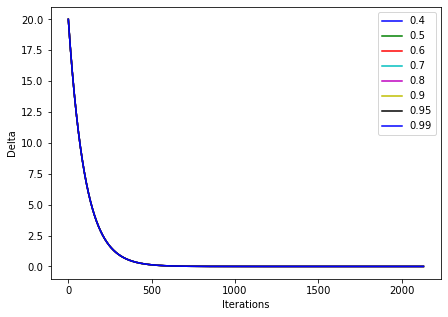

In [113]:
plt.figure(figsize=(7,5))
for i in frozen_prob:
    np.random.seed(seed=p2seed)
    large_map = generate_random_map(size=S, p=i) #p is prob frozen
    env = gym.make("FrozenLake-v0", desc=large_map)
    P, R = gym_to_mdp(env)
    vi = mdp.ValueIteration(P, R, 0.99, max_iter=max_iter, epsilon=eps)
    vi.setVerbose()
    vi_traj = vi.run()
    print("frozen probability:", i)
    print_map(large_map,S)
    print()
    print_policy(vi.policy,S)
    print(vi.V)
    print()
    its, deltas, times, rewards = parsetraj(vi_traj)
    a = plt.plot(its, deltas, label=f"{i}");
    
print("Total time:", vi_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Delta")


How many manhattan distance steps times the discount ratio

In [114]:
0.999**(16+16)

0.9684910757595268

In [115]:
z = np.reshape(np.array(np.round(vi.V,3)), (S,S))

In [116]:
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        print(z[i,j], " ", end="")
    print()

419.531  423.746  429.984  438.154  448.012  460.521  476.35  486.28  495.881  505.007  513.445  521.041  527.505  532.353  535.363  536.611  
428.333  430.651  435.147  441.877  449.382  458.95  481.158  491.717  502.086  512.175  521.71  530.669  538.946  545.777  550.642  553.175  
439.297  441.827  446.403  451.788  455.105  -1000.0  490.29  501.989  513.719  525.632  537.13  547.734  557.027  564.584  569.964  572.773  
450.383  453.471  459.426  467.848  478.24  490.079  502.884  516.047  529.31  542.279  554.603  565.945  575.946  584.173  590.109  593.242  
461.246  464.649  471.182  480.36  491.588  504.267  517.856  531.887  545.946  559.66  572.693  584.74  595.476  604.469  611.098  614.655  
472.123  475.903  483.119  493.168  505.336  518.94  533.41  548.281  563.138  577.603  591.337  604.073  615.569  625.451  632.992  637.141  
482.953  487.192  495.228  506.296  519.517  534.102  549.477  565.211  580.9  596.138  610.558  623.92  636.138  647.051  655.867  660.901  
4

## Policy Iteration

In [117]:
max_iter = 20

##### Look at convergence behavior

In [118]:
S = 16

In [119]:
np.random.seed(seed=p2seed)
large_map = generate_random_map(size=S, p=0.9) #p is prob frozen
env = gym.make("FrozenLake-v0", desc=large_map)
P, R = gym_to_mdp(env)

In [120]:
P,R;

In [140]:
pi = mdp.PolicyIteration(P, R, 0.998, max_iter=max_iter)
pi.setVerbose()
pi_traj = pi.run()

 Iteration   Variation
         1         157
         2         120
         3          70
         4          34
         5          11
         6           7
         7           3
         8           3
         9           3
        10           3
        11           3
        12           3
        13           3
        14           3
        15           3
        16           3
        17           3
        18           3
        19           3
        20           3
Iterating stopped due to maximum number of iterations condition.


In [141]:
its, deltas, times, rewards = parsetraj(pi_traj)

Text(0, 0.5, 'Deltas')

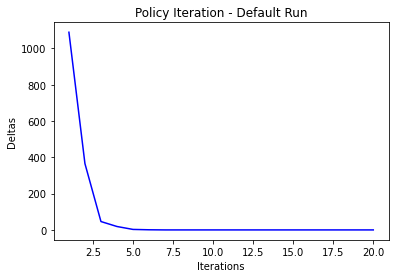

In [142]:
plt.plot(its, deltas)
plt.title("Policy Iteration - Default Run")
plt.xlabel("Iterations")
plt.ylabel("Deltas")

In [143]:
print_map(large_map, S)
print()
print_policy(pi.policy, S)
    
# LEFT = 0
# DOWN = 1
# RIGHT = 2
# UP = 3

S  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  H  H  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  H  F  F  F  F  F  F  H  F  F  F  
F  F  F  F  H  F  F  F  F  F  F  F  H  F  H  H  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  H  F  
F  H  F  F  F  F  F  F  H  F  F  F  F  F  F  F  
H  F  F  F  F  F  F  F  F  H  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  H  F  F  
F  F  F  F  F  H  F  F  F  F  F  F  F  H  F  F  
H  F  H  F  F  H  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  F  F  H  F  F  F  F  F  F  H  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  H  F  F  H  F  F  F  F  F  F  F  F  H  G  

1  2  2  2  3  3  3  2  2  2  0  0  0  0  0  3  
1  1  1  0  0  0  0  2  1  1  1  0  3  3  3  3  
1  1  1  0  0  0  2  2  1  1  1  0  0  2  3  3  
1  1  1  0  0  1  2  2  1  1  1  0  0  2  0  0  
1  1  1  1  1  1  1

In [144]:
pi_traj;

##### Run over multiple discount factors

In [147]:
disc_fac_range = [i / 10 for i in range(1, 10, 1)]
disc_fac_range.append(0.93)
disc_fac_range.append(0.95)
disc_fac_range.append(0.97)
# disc_fac_range.append(0.9999) #doesn't converge

 Iteration   Variation
         1         142
         2         118
         3          11
         4           2
         5           1
         6           1
         7           1
         8           1
         9           1
        10           1
Iterating stopped due to maximum number of iterations condition.
disc_fact: 0.1
S  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  H  H  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  H  F  F  F  F  F  F  H  F  F  F  
F  F  F  F  H  F  F  F  F  F  F  F  H  F  H  H  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  H  F  
F  H  F  F  F  F  F  F  H  F  F  F  F  F  F  F  
H  F  F  F  F  F  F  F  F  H  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  H  F  F  
F  F  F  F  F  H  F  F  F  F  F  F  F  H  F  F  
H  F  H  F  F  H  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  F  F  H  F  F  

3  3  3  2  2  3  2  1  2  2  2  2  3  0  1  2  
2  0  0  2  0  0  2  2  2  2  2  2  2  0  0  0  

 Iteration   Variation
         1         148
         2         110
         3          45
         4           6
         5           3
         6           1
         7           1
         8           1
         9           1
        10           1
Iterating stopped due to maximum number of iterations condition.
disc_fact: 0.8
S  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  H  H  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  H  F  F  F  F  F  F  H  F  F  F  
F  F  F  F  H  F  F  F  F  F  F  F  H  F  H  H  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  F  H  F  
F  H  F  F  F  F  F  F  H  F  F  F  F  F  F  F  
H  F  F  F  F  F  F  F  F  H  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  F  F  F  F  F  H  F  F  
F  F  F  F  F  H  F  F  F  F 

Text(0, 0.5, 'Delta')

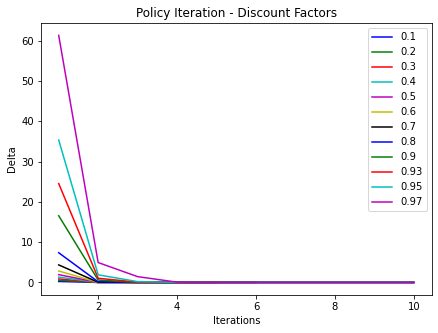

In [150]:
plt.figure(figsize=(7,5))
for i in disc_fac_range:
    pi = mdp.PolicyIteration(P, R, i, max_iter=10)
    pi.setVerbose()
    pi_traj = pi.run()
    print("disc_fact:", i)
    print_map(large_map, S)
    print()
    print_policy(pi.policy, S)
    print()
    its, deltas, times, rewards = parsetraj(pi_traj)
    a = plt.plot(its, deltas, label=f"{i}");
    
print("Total time:", pi_traj[-1]['Time'])
plt.legend();
# ymax = (10-1)*r2+r1+4;
# plt.yticks(range(0, ymax, 2));
plt.title("Policy Iteration - Discount Factors")
plt.xlabel("Iterations")
plt.ylabel("Delta")

the above shows now urgency in the policy for .9999

In [ ]:
# LEFT = 0
# DOWN = 1
# RIGHT = 2
# UP = 3

##### Run over multiple sizes of the env

In [ ]:
map_sizes = range(15, 21, 1)

In [ ]:
plt.figure(figsize=(7,5))
for i in map_sizes:
    np.random.seed(seed=p2seed)
    large_map = generate_random_map(size=i, p=0.9) #p is prob frozen
    env = gym.make("FrozenLake-v0", desc=large_map)
    P, R = gym_to_mdp(env)
    pi = mdp.PolicyIteration(P, R, 0.99, max_iter=10)
    pi.setVerbose()
    pi_traj = pi.run()
    print("lake size:", i)
    print("policy:", pi.policy)
    print("delta:", pi_traj[-1]['Mean V'])
    print()
    its, deltas, times, rewards = parsetraj(pi_traj)
    a = plt.plot(its, deltas, label=f"{i}");
    
print("Total time:", pi_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Delta")

##### Run over multiple probabilities of frozen/holes

In [ ]:
frozen_prob = [i / 10 for i in range(4, 10, 1)] + [0.95, 0.99]
S = 16

In [ ]:
plt.figure(figsize=(7,5))
for i in frozen_prob:
    np.random.seed(seed=p2seed)
    large_map = generate_random_map(size=S, p=i) #p is prob frozen
    env = gym.make("FrozenLake-v0", desc=large_map)
    P, R = gym_to_mdp(env)
    pi = mdp.PolicyIteration(P, R, 0.99, max_iter=8)
    pi.setVerbose()
    pi_traj = pi.run()
    print("frozen probability:", i)
    print("policy:", pi.policy)
    print()
    its, deltas, times, rewards = parsetraj(pi_traj)
    a = plt.plot(its, deltas, label=f"{i}");
    
print("Total time:", pi_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Delta")


In [ ]:
# z = np.reshape(np.array(np.round(pi.policy,3)), (S,S))

In [ ]:
z = np.reshape(np.array(np.round(pi.policy,3)), (S,S))
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        print(z[i,j], " ", end="")
    print()

## Q-Learning

look at convergence behavior

In [ ]:
n_iter = 1000000
S = 16

In [ ]:
np.random.seed(seed=p2seed)
large_map = generate_random_map(size=S, p=0.9) #p is prob frozen
env = gym.make("FrozenLake-v0", desc=large_map)
P, R = gym_to_mdp(env)

In [ ]:
ql = mdp.QLearning(P, R, 0.999, n_iter=n_iter, alpha=1, alpha_decay=0.99999, alpha_min=0.0001, epsilon_min=0.6, epsilon_decay=0.99999)

In [ ]:
ql_traj = ql.run()

In [ ]:
its, deltas, times, rewards = parsetraj(ql_traj)

In [ ]:
plt.plot(its, deltas)

In [ ]:
ql.policy;

In [ ]:
ql.P;

In [ ]:
ql_traj;

In [ ]:
print_map(large_map, S)
print()
print_policy(ql.policy, S)
# LEFT = 0
# DOWN = 1
# RIGHT = 2
# UP = 3

##### Run over multiple epsilon decays

epsilon = how greedy the search is

In [ ]:
epsilon_decays = [0.9, 0.99, 0.999, 0.9999, 0.99999]

In [ ]:
plt.figure(figsize=(7,5))
for i in epsilon_decays:
    ql = mdp.QLearning(P, R, 0.999, n_iter=n_iter, alpha=1, alpha_decay=0.99999, alpha_min=0.0001, epsilon_min=0.6, epsilon_decay=i)
    ql_traj = ql.run()
    print("epsilon decay:", i)
    print_policy(ql.policy, S)
    print()
    its, deltas, times, rewards = parsetraj(ql_traj)
    a = plt.plot(its, rewards, label=f"{i}");
print("Total time:", ql_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Average Rewards")

##### Run over multiple discount factors

In [ ]:
disc_fac_range = [0.1,0.3,0.5,0.7,0.9,0.95]
# disc_fac_range.append(0.99) Does not converge to normal values
# disc_fac_range.append(0.9999) Does not converge to normal values

In [ ]:
plt.figure(figsize=(7,5))
for i in disc_fac_range:
    ql = mdp.QLearning(P, R, i, n_iter=n_iter)
    ql_traj = ql.run()
    print("disc_fact:", i)
    print("policy:", ql.policy)
    print()
    its, deltas, times, rewards = parsetraj(ql_traj)
    a = plt.plot(its, rewards, label=f"{i}");
print("Total time:", ql_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Average Rewards")

##### Run over multiple alpha decay ratios

alpha = learning rate

In [ ]:
alpha_decays = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

In [ ]:
plt.figure(figsize=(7,5))
for i in alpha_decays:
    ql = mdp.QLearning(P, R, 0.9, alpha_decay=i, n_iter=3000000)
    ql_traj = ql.run()
    print("alpha decay:", i)
    print("policy:", ql.policy)
    print()
    its, deltas, times, rewards = parsetraj(ql_traj)
    a = plt.plot(its, rewards, label=f"{i}");
print("Total time:", ql_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Average Rewards")

##### Run over multiple sizes of the env

In [ ]:
S_max = 8
r1 = 4
r2 = 0.5

In [ ]:
plt.figure(figsize=(7,5))
for i in range(2,S_max+1): # forest sizes
    np.random.seed(seed=p2seed)
    large_map = generate_random_map(size=i, p=0.9) #p is prob frozen
    env = gym.make("FrozenLake-v0", desc=large_map)
    ql = mdp.QLearning(P, R, 0.9, alpha_decay=0.93, epsilon_decay=0.9, n_iter=2000000)
    ql_traj = ql.run()
    print("forest size:", i)
    print("policy:", ql.policy)
    print()
    its, deltas, times, rewards = parsetraj(ql_traj)
    a = plt.plot(its, rewards, label=f"{i}");
    
print("Total time:", ql_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Average Rewards")

##### Run over multiple probabilities of the forest burning down

In [ ]:
frozen_prob = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95]
S = 10
r1 = 4
r2 = 1

In [ ]:
plt.figure(figsize=(7,5))
for i in frozen_prob:
    np.random.seed(seed=p2seed)
    large_map = generate_random_map(size=S, p=i) #p is prob frozen
    env = gym.make("FrozenLake-v0", desc=large_map)
    ql = mdp.QLearning(P, R, 0.9, alpha_decay=0.93, epsilon_decay=0.9, n_iter=2000000)
    ql_traj = ql.run()
    print("frozen probability:", i)
    print("policy:", ql.policy)
    print()
    its, deltas, times, rewards = parsetraj(ql_traj)
    a = plt.plot(its, rewards, label=f"{i}");
    
print("Total time:", ql_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Average Rewards")